In [2]:
import requests
import pandas as pd

# Define  API key
US_CENSUS_API_KEY = 'd536de1caab79b8c378cd2a6c728144703242080'

# Base URL and common components for ACS 1-Year data
host = 'https://api.census.gov/data'
g = '?get='


# Define location filter for NY-12 congressional district
location_filter = '&for=congressional%20district:12&in=state:36'  # NY-12 district in New York

# Define variables for each table
variables_dp05 = 'NAME,DP05_0001E,DP05_0018E,DP05_0019E,DP05_0021E,DP05_0024E,DP05_0037E,DP05_0038E,DP05_0044E,DP05_0071E,DP05_0002E,DP05_0003E'
variables_dp03 = 'NAME,DP03_0004E,DP03_0005E,DP03_0062E,DP03_0088E'
#variables_s0101 = 'NAME,S0101_C01_001E,S0101_C01_002E,S0101_C01_026E,S0101_C01_030E'
variables_s1501 = 'NAME,S1501_C02_003E,S1501_C02_004E,S1501_C02_005E,S1501_C02_014E,S1501_C02_015E'
variables_dp04 = 'NAME,DP04_0089E,DP04_0134E'

# Initialize a list to store dataframes for each year
dfs = []
dfs2 = []

In [3]:




# Loop through each year and fetch data
for year in [2017,2018,2019,2020,2021, 2022, 2023]:
    # Construct query URLs for each table
    query_url_dp05 = f"{host}/{year}/acs/acs1/profile{g}{variables_dp05}{location_filter}&key={US_CENSUS_API_KEY}"
    query_url_dp03 = f"{host}/{year}/acs/acs1/profile{g}{variables_dp03}{location_filter}&key={US_CENSUS_API_KEY}"
   # query_url_s0101 = f"{host}/{year}/acs/acs1/subject{g}{variables_s0101}{location_filter}&key={US_CENSUS_API_KEY}"
    query_url_s1501 = f"{host}/{year}/acs/acs1/subject{g}{variables_s1501}{location_filter}&key={US_CENSUS_API_KEY}"
    query_url_dp04 = f"{host}/{year}/acs/acs1/profile{g}{variables_dp04}{location_filter}&key={US_CENSUS_API_KEY}"

    # Fetch data for each table
    response_dp05 = requests.get(query_url_dp05)
    response_dp03 = requests.get(query_url_dp03)
    #response_s0101 = requests.get(query_url_s0101)
    response_s1501 = requests.get(query_url_s1501)
    response_dp04 = requests.get(query_url_dp04)

    # Check if all requests were successful
    if (response_dp05.status_code == 200 and response_dp03.status_code == 200
         and response_s1501.status_code == 200
        and response_dp04.status_code == 200):

        # DP05 Data
        data_dp05 = response_dp05.json()
        columns_dp05 = data_dp05[0]  # First row is header
        data_dp05 = data_dp05[1:]    # Remaining rows are data
        df_dp05 = pd.DataFrame(data_dp05, columns=columns_dp05)

        # Rename DP05 columns for clarity
        df_dp05 = df_dp05.rename(columns={
            'NAME': 'District_Name',
            'DP05_0001E': 'Total_Population',
            'DP05_0018E': 'Median_Age',
            'DP05_0019E': 'Population_Under_18',
            'DP05_0021E': 'Population_18_and_Over',
            'DP05_0024E': 'Population_65_and_Over',
            'DP05_0037E': 'White_Alone',
            'DP05_0038E': 'Black_or_African_American_Alone',
            'DP05_0044E': 'Asian_Alone',
            'DP05_0071E': 'Hispanic_or_Latino',
            'DP05_0002E': 'Male_Population',
            'DP05_0003E': 'Female_Population'
        })

        # DP03 Data
        data_dp03 = response_dp03.json()
        columns_dp03 = data_dp03[0]  # First row is header
        data_dp03 = data_dp03[1:]    # Remaining rows are data
        df_dp03 = pd.DataFrame(data_dp03, columns=columns_dp03)

        # Rename DP03 columns for clarity
        df_dp03 = df_dp03.rename(columns={
            'NAME': 'District_Name',
            'DP03_0004E': 'Employed_Civilian_Labor_Force',
            'DP03_0005E': 'Unemployed_Civilian_Labor_Force',
            'DP03_0062E': 'Median_Household_Income',
            'DP03_0088E': 'Per_Capita_Income'
        })

        # S0101 Data
       # data_s0101 = response_s0101.json()
        #columns_s0101 = data_s0101[0]  # First row is header
        #data_s0101 = data_s0101[1:]    # Remaining rows are data
        #df_s0101 = pd.DataFrame(data_s0101, columns=columns_s0101)

        # Rename S0101 columns for clarity
        #df_s0101 = df_s0101.rename(columns={
        #   'NAME': 'District_Name',
         #   'S0101_C01_001E': 'Total_Population_AgeSex',
        #    'S0101_C01_002E': 'Population_Under_5',
        #    'S0101_C01_026E': 'Population_65_and_Over_AgeSex',
        #    'S0101_C01_030E': 'Median_Age_AgeSex'
        #})

        # S1501 Data
        data_s1501 = response_s1501.json()
        columns_s1501 = data_s1501[0]  # First row is header
        data_s1501 = data_s1501[1:]    # Remaining rows are data
        df_s1501 = pd.DataFrame(data_s1501, columns=columns_s1501)

        # Rename S1501 columns for clarity
        df_s1501 = df_s1501.rename(columns={
            'NAME': 'District_Name',
            'S1501_C02_003E': 'High_School_Grad_18_to_24',
            'S1501_C02_004E': 'College_Degree_18_to_24',
            'S1501_C02_005E': 'High_School_Grad_or_Higher_18_to_24',
            'S1501_C02_014E': 'High_School_Grad_or_Higher_Over_25',
            'S1501_C02_015E': 'Bachelor_Degree_or_Higher_Over_25'
        })

        # DP04 Data
        data_dp04 = response_dp04.json()
        columns_dp04 = data_dp04[0]  # First row is header
        data_dp04 = data_dp04[1:]    # Remaining rows are data
        df_dp04 = pd.DataFrame(data_dp04, columns=columns_dp04)

        # Rename DP04 columns for clarity
        df_dp04 = df_dp04.rename(columns={
            'NAME': 'District_Name',
            'DP04_0089E': 'Median_Home_Value',
            'DP04_0134E': 'Median_Gross_Rent',
        })

        # Merge all data for the year
        df_year = pd.merge(df_dp05, df_dp03, on=['District_Name', 'state', 'congressional district'], how='outer')
       # df_year = pd.merge(df_year, df_s0101, on=['District_Name', 'state', 'congressional district'], how='outer')
        df_year = pd.merge(df_year, df_s1501, on=['District_Name', 'state', 'congressional district'], how='outer')
        df_year = pd.merge(df_year, df_dp04, on=['District_Name', 'state', 'congressional district'], how='outer')

        # Add a column for the year
        df_year['Year'] = year

        # Append to the list
        dfs.append(df_year)
    else:
        print(f"Data for {year} is unavailable or incomplete.")

# Concatenate all years into a single DataFrame
df_new = pd.concat(dfs, ignore_index=True)

display(df_new.head())


Data for 2020 is unavailable or incomplete.


,District_Name,Total_Population,Median_Age,Population_Under_18,Population_18_and_Over,Population_65_and_Over,White_Alone,Black_or_African_American_Alone,Asian_Alone,Hispanic_or_Latino,...,Median_Household_Income,Per_Capita_Income,High_School_Grad_18_to_24,College_Degree_18_to_24,High_School_Grad_or_Higher_18_to_24,High_School_Grad_or_Higher_Over_25,Bachelor_Degree_or_Higher_Over_25,Median_Home_Value,Median_Gross_Rent,Year
0,"Congressional District 12 (115th Congress), Ne...",714279,35.7,84380,629899,107188,518707,36774,101278,105148,...,107010,89677,13.7,32.2,47.7,94.5,74.1,1004600,2156,2017
1,"Congressional District 12 (116th Congress), Ne...",698928,35.8,78781,620147,110208,506188,36314,98828,86523,...,110569,93924,16.9,39.8,40.2,95.3,74.0,1083700,2185,2018
2,"Congressional District 12 (116th Congress), Ne...",725760,36.2,86746,639014,119460,515038,38876,112130,104219,...,124502,98414,21.5,35.3,39.6,93.6,72.5,1141500,2269,2019
3,"Congressional District 12 (116th Congress), Ne...",711858,36.6,87790,624068,114429,449891,37174,104803,99158,...,112796,93168,24.4,31.3,41.4,95.5,74.7,946600,2344,2021
4,"Congressional District 12 (118th Congress), Ne...",705008,40.3,85576,619432,140266,466112,35217,98893,77679,...,142104,128081,17.2,29.8,48.5,96.6,82.3,1150200,2709,2022


In [4]:
# Define variables for each table
variables_dp05_old = 'NAME,DP05_0001E,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0025E,DP05_0032E,DP05_0033E,DP05_0039E,DP05_0066E,DP05_0002E,DP05_0003E'
variables_dp03_old = 'NAME,DP03_0004E,DP03_0005E,DP03_0062E,DP03_0088E'
#variables_s0101_old = 'NAME,S0101_C01_001E,S0101_C01_002E,S0101_C01_026E,S0101_C01_030E'
variables_s1501_old = 'NAME,S1501_C02_003E,S1501_C02_004E,S1501_C02_005E,S1501_C02_014E,S1501_C02_015E'
variables_dp04_old = 'NAME,DP04_0089E,DP04_0134E'

# Loop through each year and fetch data
for year_old in [2010,2012,2014, 2016]:
    # Construct query URLs for each table
    query_url_dp05_old = f"{host}/{year_old}/acs/acs1/profile{g}{variables_dp05_old}{location_filter}&key={US_CENSUS_API_KEY}"
    query_url_dp03_old = f"{host}/{year_old}/acs/acs1/profile{g}{variables_dp03_old}{location_filter}&key={US_CENSUS_API_KEY}"
    #query_url_s0101_old = f"{host}/{year_old}/acs/acs1/subject{g}{variables_s0101_old}{location_filter}&key={US_CENSUS_API_KEY}"
    query_url_s1501_old = f"{host}/{year_old}/acs/acs1/subject{g}{variables_s1501_old}{location_filter}&key={US_CENSUS_API_KEY}"
    query_url_dp04_old = f"{host}/{year_old}/acs/acs1/profile{g}{variables_dp04_old}{location_filter}&key={US_CENSUS_API_KEY}"

    # Fetch data for each table
    response_dp05_old = requests.get(query_url_dp05_old)
    response_dp03_old = requests.get(query_url_dp03_old)
    #response_s0101_old = requests.get(query_url_s0101_old)
    response_s1501_old = requests.get(query_url_s1501_old)
    response_dp04_old = requests.get(query_url_dp04_old)

    # Check if all requests were successful
    if (response_dp05_old.status_code == 200 and response_dp03_old.status_code == 200
         and response_s1501_old.status_code == 200
        and response_dp04_old.status_code == 200):

        # DP05 Data
        data_dp05_old = response_dp05_old.json()
        columns_dp05_old = data_dp05_old[0]  # First row is header
        data_dp05_old = data_dp05_old[1:]    # Remaining rows are data
        df_dp05_old = pd.DataFrame(data_dp05_old, columns=columns_dp05_old)

        # Rename DP05 columns for clarity
        df_dp05_old = df_dp05_old.rename(columns={
            'NAME': 'District_Name',
            'DP05_0001E': 'Total_Population',
            'DP05_0017E': 'Median_Age',
            'DP05_0016E': 'Population_Under_18',
            'DP05_0018E': 'Population_18_and_Over',
            'DP05_0025E': 'Population_65_and_Over',
            'DP05_0032E': 'White_Alone',
            'DP05_0033E': 'Black_or_African_American_Alone',
            'DP05_0039E': 'Asian_Alone',
            'DP05_0066E': 'Hispanic_or_Latino',
            'DP05_0002E': 'Male_Population',
            'DP05_0003E': 'Female_Population'
        })

        # DP03 Data
        data_dp03_old = response_dp03_old.json()
        columns_dp03_old = data_dp03_old[0]  # First row is header
        data_dp03_old = data_dp03_old[1:]    # Remaining rows are data
        df_dp03_old = pd.DataFrame(data_dp03_old, columns=columns_dp03_old)

        # Rename DP03 columns for clarity
        df_dp03_old = df_dp03_old.rename(columns={
            'NAME': 'District_Name',
            'DP03_0004E': 'Employed_Civilian_Labor_Force',
            'DP03_0005E': 'Unemployed_Civilian_Labor_Force',
            'DP03_0062E': 'Median_Household_Income',
            'DP03_0088E': 'Per_Capita_Income'
        })

        # S1501 Data
        data_s1501_old = response_s1501_old.json()
        columns_s1501_old = data_s1501_old[0]  # First row is header
        data_s1501_old = data_s1501_old[1:]    # Remaining rows are data
        df_s1501_old = pd.DataFrame(data_s1501_old, columns=columns_s1501_old)

        # Rename S1501 columns for clarity
        df_s1501_old = df_s1501_old.rename(columns={
            'NAME': 'District_Name',
            'S1501_C02_003E': 'High_School_Grad_18_to_24',
            'S1501_C02_004E': 'College_Degree_18_to_24',
            'S1501_C02_005E': 'High_School_Grad_or_Higher_18_to_24',
            'S1501_C02_014E': 'High_School_Grad_or_Higher_Over_25',
            'S1501_C02_015E': 'Bachelor_Degree_or_Higher_Over_25'
        })

        # DP04 Data
        data_dp04_old = response_dp04_old.json()
        columns_dp04_old = data_dp04_old[0]  # First row is header
        data_dp04_old = data_dp04_old[1:]    # Remaining rows are data
        df_dp04_old = pd.DataFrame(data_dp04_old, columns=columns_dp04_old)

        # Rename DP04 columns for clarity
        df_dp04_old = df_dp04_old.rename(columns={
            'NAME': 'District_Name',
            'DP04_0089E': 'Median_Home_Value',
            'DP04_0134E': 'Median_Gross_Rent',
        })

        # Merge all data for the year
        df_year_old = pd.merge(df_dp05_old, df_dp03_old, on=['District_Name', 'state', 'congressional district'], how='outer')
        df_year_old = pd.merge(df_year_old, df_s1501_old, on=['District_Name', 'state', 'congressional district'], how='outer')
        df_year_old = pd.merge(df_year_old, df_dp04_old, on=['District_Name', 'state', 'congressional district'], how='outer')

        # Add a column for the year
        df_year_old['Year'] = year_old

        # Append to the list
        dfs2.append(df_year_old)
    else:
        print(f"Data for {year_old} is unavailable or incomplete.")

# Concatenate all years into a single DataFrame
df_old = pd.concat(dfs2, ignore_index=True)

df_old


,District_Name,Total_Population,Population_Under_18,Median_Age,Population_18_and_Over,Population_65_and_Over,White_Alone,Black_or_African_American_Alone,Asian_Alone,Hispanic_or_Latino,...,Median_Household_Income,Per_Capita_Income,High_School_Grad_18_to_24,College_Degree_18_to_24,High_School_Grad_or_Higher_18_to_24,High_School_Grad_or_Higher_Over_25,Bachelor_Degree_or_Higher_Over_25,Median_Home_Value,Median_Gross_Rent,Year
0,"Congressional District 12 (111th Congress), Ne...",684876,7761,32.9,539618,63077,337846,64060,122566,318694,...,41891,23516,23.3,37.7,11.9,71.1,28.6,47330,188781,2010
1,"Congressional District 12 (113th Congress), Ne...",705637,11404,36.0,630438,99291,538578,33222,85577,85282,...,82338,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012
2,"Congressional District 12 (114th Congress), Ne...",729253,13934,35.5,638817,103067,534814,37546,97252,103602,...,94127,78605,16.4,37.1,39.9,93.5,70.5,98412,256562,2014
3,"Congressional District 12 (115th Congress), Ne...",715471,17856,35.7,629469,104203,525079,33880,100733,100453,...,100281,83122,12.5,38.2,46.2,93.4,72.2,1007200,2105,2016


In [5]:
#appending the 2020 data manually since its not available in the api

import pandas as pd
from google.colab import files

# Upload the file df_new.csv here
uploaded = files.upload()

# Assume the uploaded file is a CSV and read it into a DataFrame
for filename in uploaded.keys():
    df_new = pd.read_csv(filename)

# Display the first few rows of the DataFrame
df_new


Saving df_new.csv to df_new.csv


,Unnamed: 0,District_Name,Total_Population,Median_Age,Population_Under_18,Population_18_and_Over,Population_65_and_Over,White_Alone,Black_or_African_American_Alone,Asian_Alone,...,Median_Household_Income,Per_Capita_Income,High_School_Grad_18_to_24,College_Degree_18_to_24,High_School_Grad_or_Higher_18_to_24,High_School_Grad_or_Higher_Over_25,Bachelor_Degree_or_Higher_Over_25,Median_Home_Value,Median_Gross_Rent,Year
0,0,"Congressional District 12 (115th Congress), Ne...",714279,35.7,84380,629899,107188,518707,36774,101278,...,107010,89677,13.7,32.2,47.7,94.5,74.1,1004600,2156,2017
1,1,"Congressional District 12 (116th Congress), Ne...",698928,35.8,78781,620147,110208,506188,36314,98828,...,110569,93924,16.9,39.8,40.2,95.3,74.0,1083700,2185,2018
2,2,"Congressional District 12 (116th Congress), Ne...",725760,36.2,86746,639014,119460,515038,38876,112130,...,124502,98414,21.5,35.3,39.6,93.6,72.5,1141500,2269,2019
3,3,"Congressional District 12 (116th Congress), Ne...",721303,36.2,87109,634199,116493,509298,37962,103869,...,114058,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020
4,4,"Congressional District 12 (116th Congress), Ne...",711858,36.6,87790,624068,114429,449891,37174,104803,...,112796,93168,24.4,31.3,41.4,95.5,74.7,946600,2344,2021
5,5,"Congressional District 12 (118th Congress), Ne...",705008,40.3,85576,619432,140266,466112,35217,98893,...,142104,128081,17.2,29.8,48.5,96.6,82.3,1150200,2709,2022
6,6,"Congressional District 12 (118th Congress), Ne...",734996,40.0,93232,641764,154545,480344,38014,-999999999,...,149367,128681,11.9,27.3,57.0,97.3,81.1,1129700,3121,2023


In [6]:
df_combined_all_years = pd.concat([df_old, df_new], ignore_index=True)

# Drop the column 'Unnamed: 0' from the dataset
df_combined_all_years = df_combined_all_years.drop(columns=['Unnamed: 0'])



# Display the updated dataframe
df_combined_all_years

,District_Name,Total_Population,Population_Under_18,Median_Age,Population_18_and_Over,Population_65_and_Over,White_Alone,Black_or_African_American_Alone,Asian_Alone,Hispanic_or_Latino,...,Median_Household_Income,Per_Capita_Income,High_School_Grad_18_to_24,College_Degree_18_to_24,High_School_Grad_or_Higher_18_to_24,High_School_Grad_or_Higher_Over_25,Bachelor_Degree_or_Higher_Over_25,Median_Home_Value,Median_Gross_Rent,Year
0,"Congressional District 12 (111th Congress), Ne...",684876,7761,32.9,539618,63077,337846,64060,122566,318694,...,41891,23516,23.3,37.7,11.9,71.1,28.6,47330,188781,2010
1,"Congressional District 12 (113th Congress), Ne...",705637,11404,36.0,630438,99291,538578,33222,85577,85282,...,82338,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012
2,"Congressional District 12 (114th Congress), Ne...",729253,13934,35.5,638817,103067,534814,37546,97252,103602,...,94127,78605,16.4,37.1,39.9,93.5,70.5,98412,256562,2014
3,"Congressional District 12 (115th Congress), Ne...",715471,17856,35.7,629469,104203,525079,33880,100733,100453,...,100281,83122,12.5,38.2,46.2,93.4,72.2,1007200,2105,2016
4,"Congressional District 12 (115th Congress), Ne...",714279,84380,35.7,629899,107188,518707,36774,101278,105148,...,107010,89677,13.7,32.2,47.7,94.5,74.1,1004600,2156,2017
5,"Congressional District 12 (116th Congress), Ne...",698928,78781,35.8,620147,110208,506188,36314,98828,86523,...,110569,93924,16.9,39.8,40.2,95.3,74.0,1083700,2185,2018
6,"Congressional District 12 (116th Congress), Ne...",725760,86746,36.2,639014,119460,515038,38876,112130,104219,...,124502,98414,21.5,35.3,39.6,93.6,72.5,1141500,2269,2019
7,"Congressional District 12 (116th Congress), Ne...",721303,87109,36.2,634199,116493,509298,37962,103869,101623,...,114058,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020
8,"Congressional District 12 (116th Congress), Ne...",711858,87790,36.6,624068,114429,449891,37174,104803,99158,...,112796,93168,24.4,31.3,41.4,95.5,74.7,946600,2344,2021
9,"Congressional District 12 (118th Congress), Ne...",705008,85576,40.3,619432,140266,466112,35217,98893,77679,...,142104,128081,17.2,29.8,48.5,96.6,82.3,1150200,2709,2022


In [7]:
print(df_combined_all_years.dtypes)


District_Name                          object
Total_Population                       object
Population_Under_18                    object
Median_Age                             object
Population_18_and_Over                 object
Population_65_and_Over                 object
White_Alone                            object
Black_or_African_American_Alone        object
Asian_Alone                            object
Hispanic_or_Latino                     object
Male_Population                        object
Female_Population                      object
state                                  object
congressional district                 object
Employed_Civilian_Labor_Force          object
Unemployed_Civilian_Labor_Force        object
Median_Household_Income                object
Per_Capita_Income                      object
High_School_Grad_18_to_24              object
College_Degree_18_to_24                object
High_School_Grad_or_Higher_18_to_24    object
High_School_Grad_or_Higher_Over_25

In [8]:
# Exclude 'Year' column from conversion
for col in df_combined_all_years.columns:
    if col != 'Year' and col!='District_Name':
        df_combined_all_years[col] = pd.to_numeric(df_combined_all_years[col], errors='coerce')

# Verify the types again
print(df_combined_all_years.dtypes)


District_Name                           object
Total_Population                         int64
Population_Under_18                      int64
Median_Age                             float64
Population_18_and_Over                   int64
Population_65_and_Over                   int64
White_Alone                              int64
Black_or_African_American_Alone          int64
Asian_Alone                              int64
Hispanic_or_Latino                       int64
Male_Population                          int64
Female_Population                        int64
state                                  float64
congressional district                   int64
Employed_Civilian_Labor_Force            int64
Unemployed_Civilian_Labor_Force          int64
Median_Household_Income                  int64
Per_Capita_Income                        int64
High_School_Grad_18_to_24              float64
College_Degree_18_to_24                float64
High_School_Grad_or_Higher_18_to_24    float64
High_School_G

In [9]:
#calculating population under 18
df_combined_all_years["Population_Under_18"] = (
    df_combined_all_years["Total_Population"] - df_combined_all_years["Population_18_and_Over"]
)

df_combined_all_years

,District_Name,Total_Population,Population_Under_18,Median_Age,Population_18_and_Over,Population_65_and_Over,White_Alone,Black_or_African_American_Alone,Asian_Alone,Hispanic_or_Latino,...,Median_Household_Income,Per_Capita_Income,High_School_Grad_18_to_24,College_Degree_18_to_24,High_School_Grad_or_Higher_18_to_24,High_School_Grad_or_Higher_Over_25,Bachelor_Degree_or_Higher_Over_25,Median_Home_Value,Median_Gross_Rent,Year
0,"Congressional District 12 (111th Congress), Ne...",684876,145258,32.9,539618,63077,337846,64060,122566,318694,...,41891,23516,23.3,37.7,11.9,71.1,28.6,47330,188781,2010
1,"Congressional District 12 (113th Congress), Ne...",705637,75199,36.0,630438,99291,538578,33222,85577,85282,...,82338,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012
2,"Congressional District 12 (114th Congress), Ne...",729253,90436,35.5,638817,103067,534814,37546,97252,103602,...,94127,78605,16.4,37.1,39.9,93.5,70.5,98412,256562,2014
3,"Congressional District 12 (115th Congress), Ne...",715471,86002,35.7,629469,104203,525079,33880,100733,100453,...,100281,83122,12.5,38.2,46.2,93.4,72.2,1007200,2105,2016
4,"Congressional District 12 (115th Congress), Ne...",714279,84380,35.7,629899,107188,518707,36774,101278,105148,...,107010,89677,13.7,32.2,47.7,94.5,74.1,1004600,2156,2017
5,"Congressional District 12 (116th Congress), Ne...",698928,78781,35.8,620147,110208,506188,36314,98828,86523,...,110569,93924,16.9,39.8,40.2,95.3,74.0,1083700,2185,2018
6,"Congressional District 12 (116th Congress), Ne...",725760,86746,36.2,639014,119460,515038,38876,112130,104219,...,124502,98414,21.5,35.3,39.6,93.6,72.5,1141500,2269,2019
7,"Congressional District 12 (116th Congress), Ne...",721303,87104,36.2,634199,116493,509298,37962,103869,101623,...,114058,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020
8,"Congressional District 12 (116th Congress), Ne...",711858,87790,36.6,624068,114429,449891,37174,104803,99158,...,112796,93168,24.4,31.3,41.4,95.5,74.7,946600,2344,2021
9,"Congressional District 12 (118th Congress), Ne...",705008,85576,40.3,619432,140266,466112,35217,98893,77679,...,142104,128081,17.2,29.8,48.5,96.6,82.3,1150200,2709,2022


In [10]:
print(df_combined_all_years.describe())


       Total_Population  Population_Under_18  Median_Age  \
count         11.000000            11.000000   11.000000   
mean      713397.181818         90954.909091   36.445455   
std        14471.069019         18681.507682    2.069475   
min       684876.000000         75199.000000   32.900000   
25%       705322.500000         84978.000000   35.700000   
50%       714279.000000         86746.000000   36.000000   
75%       723531.500000         89113.000000   36.400000   
max       734996.000000        145258.000000   40.300000   

       Population_18_and_Over  Population_65_and_Over    White_Alone  \
count               11.000000               11.000000      11.000000   
mean            622442.272727           112020.636364  489263.181818   
std              28460.579952            23265.241676   57533.976855   
min             539618.000000            63077.000000  337846.000000   
25%             622107.500000           103635.000000  473228.000000   
50%             629899.0000

In [11]:
print(df_combined_all_years.isnull().sum()) #checking nulls


District_Name                          0
Total_Population                       0
Population_Under_18                    0
Median_Age                             0
Population_18_and_Over                 0
Population_65_and_Over                 0
White_Alone                            0
Black_or_African_American_Alone        0
Asian_Alone                            0
Hispanic_or_Latino                     0
Male_Population                        0
Female_Population                      0
state                                  1
congressional district                 0
Employed_Civilian_Labor_Force          0
Unemployed_Civilian_Labor_Force        0
Median_Household_Income                0
Per_Capita_Income                      0
High_School_Grad_18_to_24              0
College_Degree_18_to_24                0
High_School_Grad_or_Higher_18_to_24    0
High_School_Grad_or_Higher_Over_25     0
Bachelor_Degree_or_Higher_Over_25      0
Median_Home_Value                      0
Median_Gross_Ren

In [14]:
#uploading election history dataset. Run again to upload president dataset.
import pandas as pd

# Upload the file
from google.colab import files
uploaded = files.upload()



Saving elstats_search_23575a519141a70c_copy.csv to elstats_search_23575a519141a70c_copy.csv


In [15]:
# Load the district election history dataset
df_election_history = pd.read_csv('elstats_search_23575a519141a70c_copy.csv')
df_election_history.head()


,contest_id,election_id,election_date,election_type,primary_party,question_text,question_type,office_id,office_name,office_modifier,...,retention_candidate_id,retention_candidate_name,division_id,division_type,division_name,vote_channel,is_winner,candidate_party_id,candidate_party_name,votes
0,16,1,2022-11-08T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68,County,New York,NaN,True,7.0,Democratic,184872
1,16,1,2022-11-08T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68,County,New York,NaN,True,10.0,Working Families,16018
2,16,1,2022-11-08T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68,County,New York,NaN,False,8.0,Republican,40994
3,16,1,2022-11-08T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68,County,New York,NaN,False,9.0,Conservative,2715
4,16,1,2022-11-08T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68,County,New York,NaN,False,19.0,Parent,40994


In [16]:
# Load the president election history dataset
df_pres = pd.read_csv('president.csv')
df_pres.head()


,contest_id,election_id,election_date,election_type,primary_party,question_text,question_type,office_id,office_name,office_modifier,...,retention_candidate_id,retention_candidate_name,division_id,division_type,division_name,vote_channel,is_winner,candidate_party_id,candidate_party_name,votes
0,308,5,2020-11-03T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,County,Albany,NaN,True,7.0,Democratic,91260
1,308,5,2020-11-03T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,County,Albany,NaN,True,10.0,Working Families,8214
2,308,5,2020-11-03T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,County,Albany,NaN,False,8.0,Republican,46066
3,308,5,2020-11-03T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,County,Albany,NaN,False,9.0,Conservative,5015
4,308,5,2020-11-03T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,County,Albany,NaN,False,29.0,Libertarian,1523


In [17]:
# Remove the specified columns from district election
columns_to_remove = [
    'question_text', 'question_type', 'office_id', 'office_name',
    'office_modifier', 'retention_candidate_id', 'retention_candidate_name', 'vote_channel'
]
df_election_history.drop(columns=columns_to_remove, inplace=True)

# Display the first few rows to verify
df_election_history.head()


,contest_id,election_id,election_date,election_type,primary_party,district_id,district_type,district_name,candidate_id,candidate_name,division_id,division_type,division_name,is_winner,candidate_party_id,candidate_party_name,votes
0,16,1,2022-11-08T00:00:00Z,General,NaN,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,7.0,Democratic,184872
1,16,1,2022-11-08T00:00:00Z,General,NaN,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,10.0,Working Families,16018
2,16,1,2022-11-08T00:00:00Z,General,NaN,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,8.0,Republican,40994
3,16,1,2022-11-08T00:00:00Z,General,NaN,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,9.0,Conservative,2715
4,16,1,2022-11-08T00:00:00Z,General,NaN,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,19.0,Parent,40994


In [18]:
# Remove the specified columns from presidential election
columns_to_remove = [
    'question_text', 'question_type', 'office_id', 'office_name',
    'office_modifier', 'retention_candidate_id', 'retention_candidate_name', 'vote_channel'
]
df_pres.drop(columns=columns_to_remove, inplace=True)

# Display the first few rows to verify
df_pres.head()


,contest_id,election_id,election_date,election_type,primary_party,district_id,district_type,district_name,candidate_id,candidate_name,division_id,division_type,division_name,is_winner,candidate_party_id,candidate_party_name,votes
0,308,5,2020-11-03T00:00:00Z,General,NaN,1,State,New York,640,Joseph R. Biden and Kamala Harris,2,County,Albany,True,7.0,Democratic,91260
1,308,5,2020-11-03T00:00:00Z,General,NaN,1,State,New York,640,Joseph R. Biden and Kamala Harris,2,County,Albany,True,10.0,Working Families,8214
2,308,5,2020-11-03T00:00:00Z,General,NaN,1,State,New York,641,Donald J. Trump and Michael R. Pence,2,County,Albany,False,8.0,Republican,46066
3,308,5,2020-11-03T00:00:00Z,General,NaN,1,State,New York,641,Donald J. Trump and Michael R. Pence,2,County,Albany,False,9.0,Conservative,5015
4,308,5,2020-11-03T00:00:00Z,General,NaN,1,State,New York,643,Jo Jorgensen and Jeremy Cohen,2,County,Albany,False,29.0,Libertarian,1523


In [19]:
#district election
# Define values to ignore
ignore_names = ["scattering", "blank", "void"]

# Creating a dictionary to store the first occurrence of candidate party by candidate name
party_dict = {}

# Populating the dictionary with the first observed non-NaN party value for each candidate
for idx, row in df_election_history.iterrows():
    candidate = row['candidate_name']
    candidate_party = row['candidate_party_name']

    # Only storing the candidate party if it's not NaN and the candidate name isn't in the ignore list
    if pd.notna(candidate_party) and candidate.lower() not in ignore_names:
        if candidate not in party_dict:
            party_dict[candidate] = candidate_party

# Using the dictionary to replace NaN values in 'primary_party' for all occurrences of each candidate
df_election_history['primary_party'] = df_election_history.apply(
    lambda x: party_dict.get(x['candidate_name']) if (pd.isna(x['primary_party']) or x['primary_party'] != party_dict.get(x['candidate_name'])) and x['candidate_name'].lower() not in ignore_names else x['primary_party'],
    axis=1
)

# Displaying the first few rows to verify
display(df_election_history)


,contest_id,election_id,election_date,election_type,primary_party,district_id,district_type,district_name,candidate_id,candidate_name,division_id,division_type,division_name,is_winner,candidate_party_id,candidate_party_name,votes
0,16,1,2022-11-08T00:00:00Z,General,Democratic,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,7.0,Democratic,184872
1,16,1,2022-11-08T00:00:00Z,General,Democratic,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,10.0,Working Families,16018
2,16,1,2022-11-08T00:00:00Z,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,8.0,Republican,40994
3,16,1,2022-11-08T00:00:00Z,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,9.0,Conservative,2715
4,16,1,2022-11-08T00:00:00Z,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,19.0,Parent,40994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5205,84,1996-11-05T00:00:00Z,General,Republican,188,Congressional District,12,12570,Miguel I. Prado,430,County,Queens,False,9.0,Conservative,359
297,5205,84,1996-11-05T00:00:00Z,General,Republican,188,Congressional District,12,12570,Miguel I. Prado,430,County,Queens,False,96.0,Right to Life,2629
298,5205,84,1996-11-05T00:00:00Z,General,Socialist Workers,188,Congressional District,12,12571,Eleanor Garcia,430,County,Queens,False,147.0,Socialist Workers,240
299,5205,84,1996-11-05T00:00:00Z,General,Republican,188,Congressional District,12,5725,Blank/Void/Scattering,430,County,Queens,False,8.0,Republican,5785


In [20]:
#President
# Define values to ignore
ignore_names = ["scattering", "blank", "void"]

# Creating a dictionary to store the first occurrence of candidate party by candidate name
party_dict = {}

# Populating the dictionary with the first observed non-NaN party value for each candidate
for idx, row in df_pres.iterrows():
    candidate = row['candidate_name']
    candidate_party = row['candidate_party_name']

    # Only storing the candidate party if it's not NaN and the candidate name isn't in the ignore list
    if pd.notna(candidate_party) and candidate.lower() not in ignore_names:
        if candidate not in party_dict:
            party_dict[candidate] = candidate_party

# Using the dictionary to replace NaN values in 'primary_party' for all occurrences of each candidate
df_pres['primary_party'] = df_pres.apply(
    lambda x: party_dict.get(x['candidate_name']) if (pd.isna(x['primary_party']) or x['primary_party'] != party_dict.get(x['candidate_name'])) and x['candidate_name'].lower() not in ignore_names else x['primary_party'],
    axis=1
)

# Displaying the first few rows to verify
display(df_pres)


,contest_id,election_id,election_date,election_type,primary_party,district_id,district_type,district_name,candidate_id,candidate_name,division_id,division_type,division_name,is_winner,candidate_party_id,candidate_party_name,votes
0,308,5,2020-11-03T00:00:00Z,General,Democratic,1,State,New York,640,Joseph R. Biden and Kamala Harris,2,County,Albany,True,7.0,Democratic,91260
1,308,5,2020-11-03T00:00:00Z,General,Democratic,1,State,New York,640,Joseph R. Biden and Kamala Harris,2,County,Albany,True,10.0,Working Families,8214
2,308,5,2020-11-03T00:00:00Z,General,Republican,1,State,New York,641,Donald J. Trump and Michael R. Pence,2,County,Albany,False,8.0,Republican,46066
3,308,5,2020-11-03T00:00:00Z,General,Republican,1,State,New York,641,Donald J. Trump and Michael R. Pence,2,County,Albany,False,9.0,Conservative,5015
4,308,5,2020-11-03T00:00:00Z,General,Libertarian,1,State,New York,643,Jo Jorgensen and Jeremy Cohen,2,County,Albany,False,29.0,Libertarian,1523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5823,2385,34,2012-11-06T00:00:00Z,General,None,1,State,New York,4835,Kevin Thorne,58,County,Yates,False,NaN,NaN,0
5824,2385,34,2012-11-06T00:00:00Z,General,NaN,1,State,New York,6,Scattering,58,County,Yates,False,NaN,NaN,0
5825,2385,34,2012-11-06T00:00:00Z,General,NaN,1,State,New York,10,Blank,58,County,Yates,False,NaN,NaN,57
5826,2385,34,2012-11-06T00:00:00Z,General,NaN,1,State,New York,9,Void,58,County,Yates,False,NaN,NaN,15


In [21]:
#President
# Converting the 'election_date' column to datetime format if it isn't already
df_pres['election_date'] = pd.to_datetime(df_pres['election_date'], errors='coerce')

# Extracting the year and create a new column 'election_year'
df_pres['election_year'] = df_pres['election_date'].dt.year

# Dropping the original 'election_date' column
df_pres.drop(columns=['election_date'], inplace=True)

# Displaying the first few rows to verify
df_pres.head()


,contest_id,election_id,election_type,primary_party,district_id,district_type,district_name,candidate_id,candidate_name,division_id,division_type,division_name,is_winner,candidate_party_id,candidate_party_name,votes,election_year
0,308,5,General,Democratic,1,State,New York,640,Joseph R. Biden and Kamala Harris,2,County,Albany,True,7.0,Democratic,91260,2020
1,308,5,General,Democratic,1,State,New York,640,Joseph R. Biden and Kamala Harris,2,County,Albany,True,10.0,Working Families,8214,2020
2,308,5,General,Republican,1,State,New York,641,Donald J. Trump and Michael R. Pence,2,County,Albany,False,8.0,Republican,46066,2020
3,308,5,General,Republican,1,State,New York,641,Donald J. Trump and Michael R. Pence,2,County,Albany,False,9.0,Conservative,5015,2020
4,308,5,General,Libertarian,1,State,New York,643,Jo Jorgensen and Jeremy Cohen,2,County,Albany,False,29.0,Libertarian,1523,2020


In [22]:
#District
# Converting the 'election_date' column to datetime format if it isn't already
df_election_history['election_date'] = pd.to_datetime(df_election_history['election_date'], errors='coerce')

# Extracting the year and create a new column 'election_year'
df_election_history['election_year'] = df_election_history['election_date'].dt.year

# Dropping the original 'election_date' column
df_election_history.drop(columns=['election_date'], inplace=True)

# Displaying the first few rows to verify
df_election_history.head()


,contest_id,election_id,election_type,primary_party,district_id,district_type,district_name,candidate_id,candidate_name,division_id,division_type,division_name,is_winner,candidate_party_id,candidate_party_name,votes,election_year
0,16,1,General,Democratic,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,7.0,Democratic,184872,2022
1,16,1,General,Democratic,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,10.0,Working Families,16018,2022
2,16,1,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,8.0,Republican,40994,2022
3,16,1,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,9.0,Conservative,2715,2022
4,16,1,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,19.0,Parent,40994,2022


In [23]:
#District
# List of columns to drop
columns_to_drop = ['contest_id', 'election_type', 'district_type', 'division_type']

# Drop the specified columns if they exist in the DataFrame
df_election_history = df_election_history.drop(columns=[col for col in columns_to_drop if col in df_election_history.columns])

# Display the first few rows of the updated DataFrame to verify
df_election_history.head()

,election_id,primary_party,district_id,district_name,candidate_id,candidate_name,division_id,division_name,is_winner,candidate_party_id,candidate_party_name,votes,election_year
0,1,Democratic,188,12,43,Jerrold L. Nadler,68,New York,True,7.0,Democratic,184872,2022
1,1,Democratic,188,12,43,Jerrold L. Nadler,68,New York,True,10.0,Working Families,16018,2022
2,1,Republican,188,12,44,Michael K. Zumbluskas,68,New York,False,8.0,Republican,40994,2022
3,1,Republican,188,12,44,Michael K. Zumbluskas,68,New York,False,9.0,Conservative,2715,2022
4,1,Republican,188,12,44,Michael K. Zumbluskas,68,New York,False,19.0,Parent,40994,2022


In [24]:
#President
# List of columns to drop
columns_to_drop = ['contest_id', 'election_type', 'district_type', 'division_type']

# Drop the specified columns if they exist in the DataFrame
df_pres = df_pres.drop(columns=[col for col in columns_to_drop if col in df_pres.columns])

# Display the first few rows of the updated DataFrame to verify
df_pres.head()

,election_id,primary_party,district_id,district_name,candidate_id,candidate_name,division_id,division_name,is_winner,candidate_party_id,candidate_party_name,votes,election_year
0,5,Democratic,1,New York,640,Joseph R. Biden and Kamala Harris,2,Albany,True,7.0,Democratic,91260,2020
1,5,Democratic,1,New York,640,Joseph R. Biden and Kamala Harris,2,Albany,True,10.0,Working Families,8214,2020
2,5,Republican,1,New York,641,Donald J. Trump and Michael R. Pence,2,Albany,False,8.0,Republican,46066,2020
3,5,Republican,1,New York,641,Donald J. Trump and Michael R. Pence,2,Albany,False,9.0,Conservative,5015,2020
4,5,Libertarian,1,New York,643,Jo Jorgensen and Jeremy Cohen,2,Albany,False,29.0,Libertarian,1523,2020


In [25]:
# Update the original DataFrame
df_pres = df_pres[df_pres['division_name'] == "New York "]

# Verify the updated data

df_pres

,election_id,primary_party,district_id,district_name,candidate_id,candidate_name,division_id,division_name,is_winner,candidate_party_id,candidate_party_name,votes,election_year
840,5,Democratic,1,New York,640,Joseph R. Biden and Kamala Harris,68,New York,True,7.0,Democratic,540748,2020
841,5,Democratic,1,New York,640,Joseph R. Biden and Kamala Harris,68,New York,True,10.0,Working Families,62292,2020
842,5,Republican,1,New York,641,Donald J. Trump and Michael R. Pence,68,New York,False,8.0,Republican,79032,2020
843,5,Republican,1,New York,641,Donald J. Trump and Michael R. Pence,68,New York,False,9.0,Conservative,6153,2020
844,5,Libertarian,1,New York,643,Jo Jorgensen and Jeremy Cohen,68,New York,False,29.0,Libertarian,3329,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,34,None,1,New York,4835,Kevin Thorne,68,New York,False,NaN,NaN,0,2012
5142,34,NaN,1,New York,6,Scattering,68,New York,False,NaN,NaN,609,2012
5143,34,NaN,1,New York,10,Blank,68,New York,False,NaN,NaN,3597,2012
5144,34,NaN,1,New York,9,Void,68,New York,False,NaN,NaN,0,2012


In [26]:
# Get unique values in 'division_name'
unique_division_names = df_pres['division_name'].unique()
print(unique_division_names)


['New York ']


In [27]:
election_data = df_election_history
acs_data= df_combined_all_years
acs_data_pres=df_combined_all_years
pres_data=df_pres
print(election_data['election_year'].unique())
print(acs_data['Year'].unique())
print(pres_data['election_year'].unique())
# Filter election_data to include only years in acs_data
election_data = election_data[election_data['election_year'].isin(acs_data['Year'].unique())]
pres_data = pres_data[pres_data['election_year'].isin(acs_data['Year'].unique())]

# Filter acs_data to include only years in election_data
acs_data = acs_data[acs_data['Year'].isin(election_data['election_year'].unique())]
acs_data_pres = acs_data_pres[acs_data_pres['Year'].isin(pres_data['election_year'].unique())]


merged_data = pd.merge(election_data, acs_data, left_on='election_year', right_on='Year', how='inner')
merged_data_pres = pd.merge(pres_data, acs_data_pres, left_on='election_year', right_on='Year', how='inner')

merged_data_pres

[2022 2020 2018 2016 2014 2012 2010 2008 2006 2004 2002 2000 1998 1996]
[2010 2012 2014 2016 2017 2018 2019 2020 2021 2022 2023]
[2020 2016 2012]


,election_id,primary_party,district_id,district_name,candidate_id,candidate_name,division_id,division_name,is_winner,candidate_party_id,...,Median_Household_Income,Per_Capita_Income,High_School_Grad_18_to_24,College_Degree_18_to_24,High_School_Grad_or_Higher_18_to_24,High_School_Grad_or_Higher_Over_25,Bachelor_Degree_or_Higher_Over_25,Median_Home_Value,Median_Gross_Rent,Year
0,5,Democratic,1,New York,640,Joseph R. Biden and Kamala Harris,68,New York,True,7.0,...,114058,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020
1,5,Democratic,1,New York,640,Joseph R. Biden and Kamala Harris,68,New York,True,10.0,...,114058,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020
2,5,Republican,1,New York,641,Donald J. Trump and Michael R. Pence,68,New York,False,8.0,...,114058,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020
3,5,Republican,1,New York,641,Donald J. Trump and Michael R. Pence,68,New York,False,9.0,...,114058,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020
4,5,Libertarian,1,New York,643,Jo Jorgensen and Jeremy Cohen,68,New York,False,29.0,...,114058,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,34,None,1,New York,4835,Kevin Thorne,68,New York,False,NaN,...,82338,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012
90,34,NaN,1,New York,6,Scattering,68,New York,False,NaN,...,82338,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012
91,34,NaN,1,New York,10,Blank,68,New York,False,NaN,...,82338,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012
92,34,NaN,1,New York,9,Void,68,New York,False,NaN,...,82338,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012


In [28]:
# Assuming the dataframe is named df

merged_data = merged_data[merged_data['candidate_party_name'] != "Parent"]
merged_data = merged_data[merged_data['candidate_party_name'] != "Reform"]
merged_data = merged_data[merged_data['candidate_party_name'] != "Independence"]

#merged_data.to_csv('merge.csv', index=False)

#files.download('merge.csv')


In [29]:





# Add the total_votes column based on candidate_id and Year
merged_data['total_votes'] = merged_data.groupby(['candidate_id', 'Year'])['votes'].transform('sum')

merged_data_pres['total_votes'] = merged_data_pres.groupby(['candidate_id', 'Year'])['votes'].transform('sum')


In [30]:
# Drop duplicates, keeping the first instance for each candidate_id per year
deduplicated_df = merged_data.drop_duplicates(subset=['candidate_id', 'election_year'], keep='first')

deduplicated_df_pres=merged_data_pres.drop_duplicates(subset=['candidate_id', 'election_year'], keep='first')
deduplicated_df_pres

,election_id,primary_party,district_id,district_name,candidate_id,candidate_name,division_id,division_name,is_winner,candidate_party_id,...,Per_Capita_Income,High_School_Grad_18_to_24,College_Degree_18_to_24,High_School_Grad_or_Higher_18_to_24,High_School_Grad_or_Higher_Over_25,Bachelor_Degree_or_Higher_Over_25,Median_Home_Value,Median_Gross_Rent,Year,total_votes
0,5,Democratic,1,New York,640,Joseph R. Biden and Kamala Harris,68,New York,True,7.0,...,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020,603040
2,5,Republican,1,New York,641,Donald J. Trump and Michael R. Pence,68,New York,False,8.0,...,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020,85185
4,5,Libertarian,1,New York,643,Jo Jorgensen and Jeremy Cohen,68,New York,False,29.0,...,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020,3329
5,5,Green,1,New York,642,Howie Hawkins and Angela Nicole Walker,68,New York,False,28.0,...,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020,2694
6,5,Independence,1,New York,644,Brock Pierce and Karla Ballard,68,New York,False,18.0,...,95376,11.9,27.3,40.1,97.3,81.1,1129700,3121,2020,656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,34,None,1,New York,4835,Kevin Thorne,68,New York,False,NaN,...,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012,0
90,34,NaN,1,New York,6,Scattering,68,New York,False,NaN,...,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012,609
91,34,NaN,1,New York,10,Blank,68,New York,False,NaN,...,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012,3597
92,34,NaN,1,New York,9,Void,68,New York,False,NaN,...,75021,18.6,27.9,47.0,93.8,70.1,96986,261135,2012,0


In [31]:
# Filter the dataset for Democratic and Republican primary parties only
merged_data = merged_data[merged_data['primary_party'].isin(['Democratic', 'Republican'])]

# Verify the filtering
print(merged_data['primary_party'].unique())

# Select relevant features and target
features = [
     'Population_Under_18', 'Median_Age', 'Population_18_and_Over',
       'Population_65_and_Over', 'White_Alone',
       'Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino',
       'Male_Population', 'Female_Population', 'Employed_Civilian_Labor_Force',
       'Unemployed_Civilian_Labor_Force', 'Median_Household_Income',
       'Per_Capita_Income', 'High_School_Grad_18_to_24'
]
target = 'primary_party'



['Democratic' 'Republican']


In [32]:
# Filter the dataset for Democratic and Republican primary parties only
merged_data_pres = merged_data_pres[merged_data_pres['primary_party'].isin(['Democratic', 'Republican'])]

# Verify the filtering
print(merged_data_pres['primary_party'].unique())

# Select relevant features and target
features = [
        'Population_Under_18', 'Median_Age', 'Population_18_and_Over',
       'Population_65_and_Over', 'White_Alone',
       'Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino',
       'Male_Population', 'Female_Population', 'Employed_Civilian_Labor_Force',
       'Unemployed_Civilian_Labor_Force', 'Median_Household_Income',
       'Per_Capita_Income', 'High_School_Grad_18_to_24'
]
target = 'primary_party'



['Democratic' 'Republican']


In [33]:

columns_to_extrapolate = [ 'Total_Population',
       'Population_Under_18', 'Median_Age', 'Population_18_and_Over',
       'Population_65_and_Over', 'White_Alone',
       'Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino',
       'Male_Population', 'Female_Population', 'state',
       'congressional district', 'Employed_Civilian_Labor_Force',
       'Unemployed_Civilian_Labor_Force', 'Median_Household_Income',
       'Per_Capita_Income', 'High_School_Grad_18_to_24',
       'College_Degree_18_to_24', 'High_School_Grad_or_Higher_18_to_24',
       'High_School_Grad_or_Higher_Over_25',
       'Bachelor_Degree_or_Higher_Over_25', 'Median_Home_Value',
       'Median_Gross_Rent']


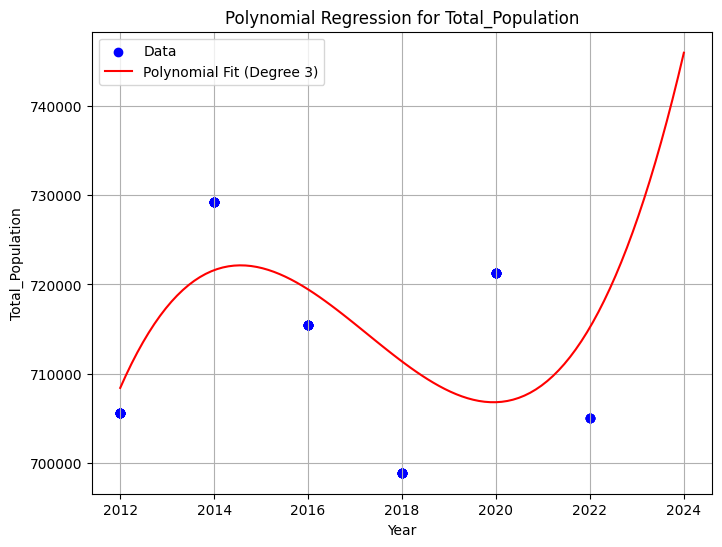

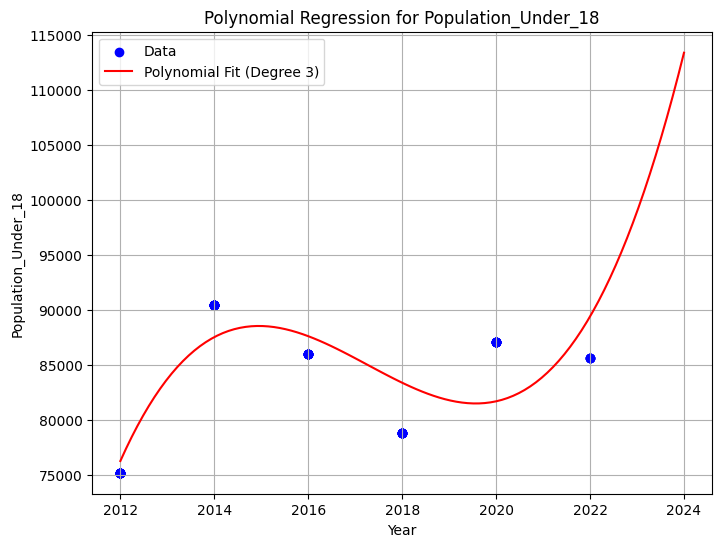

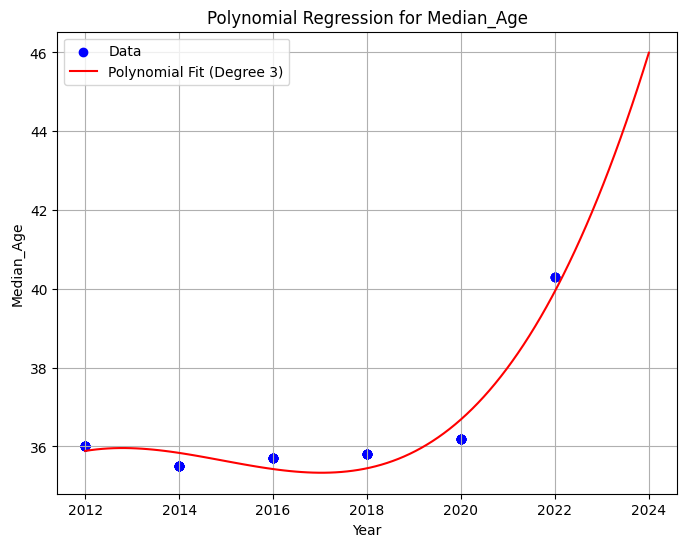

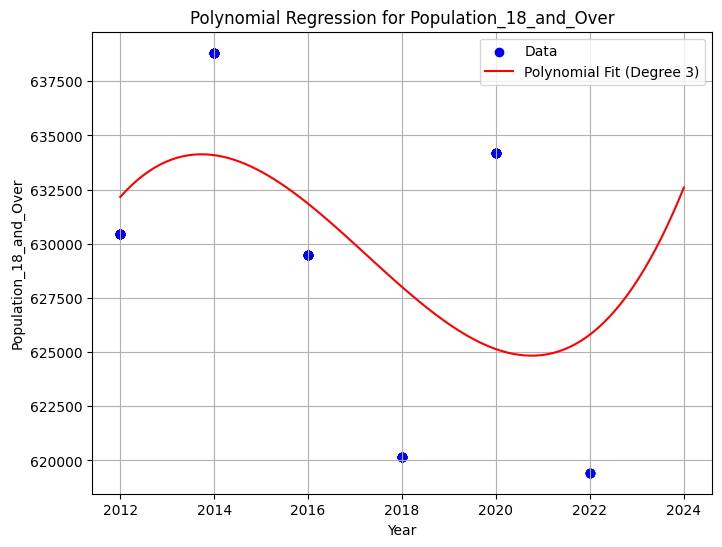

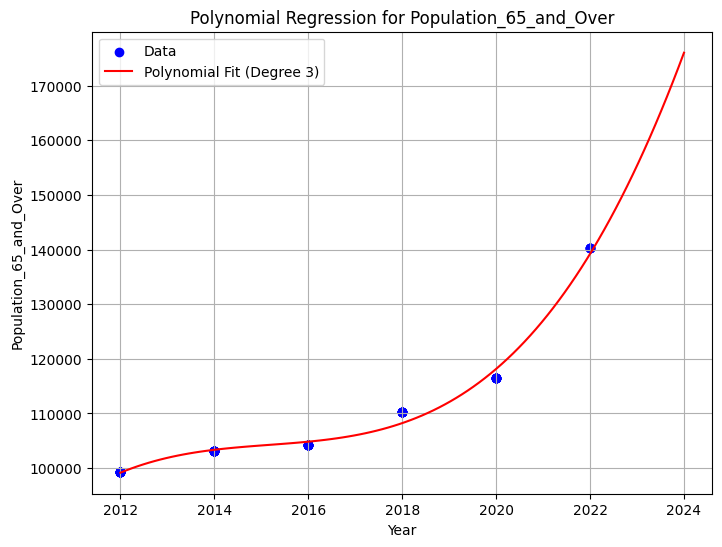

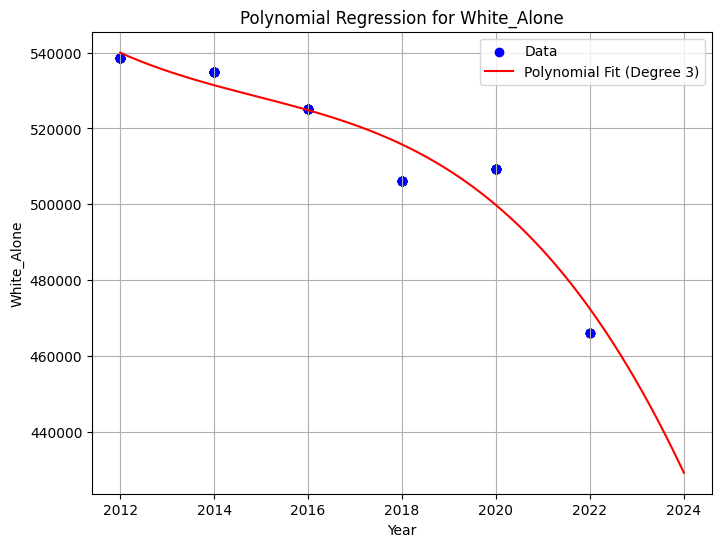

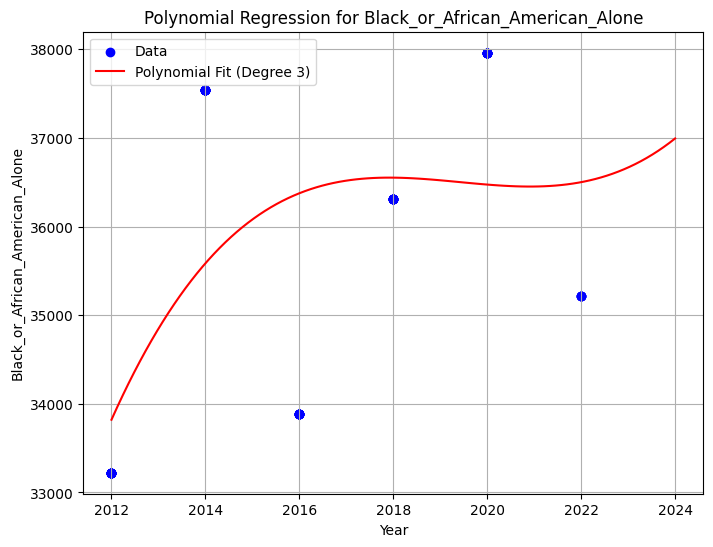

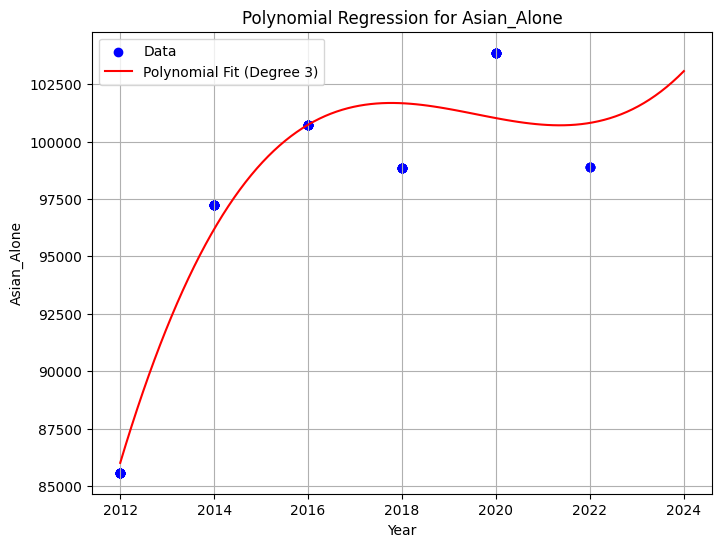

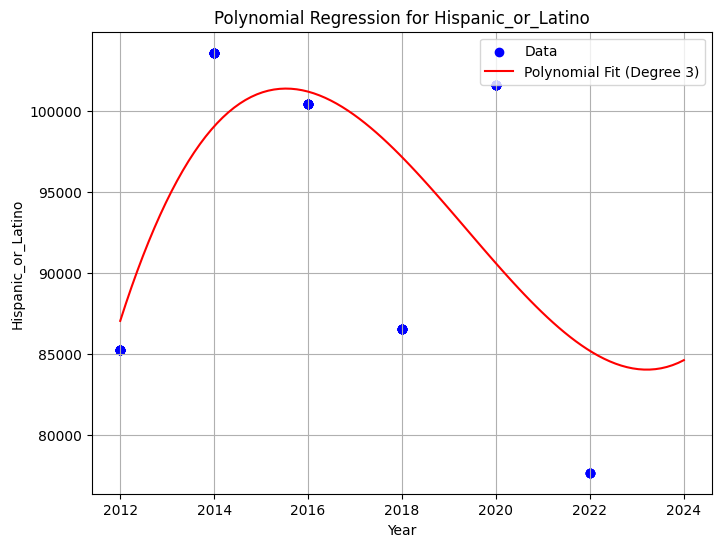

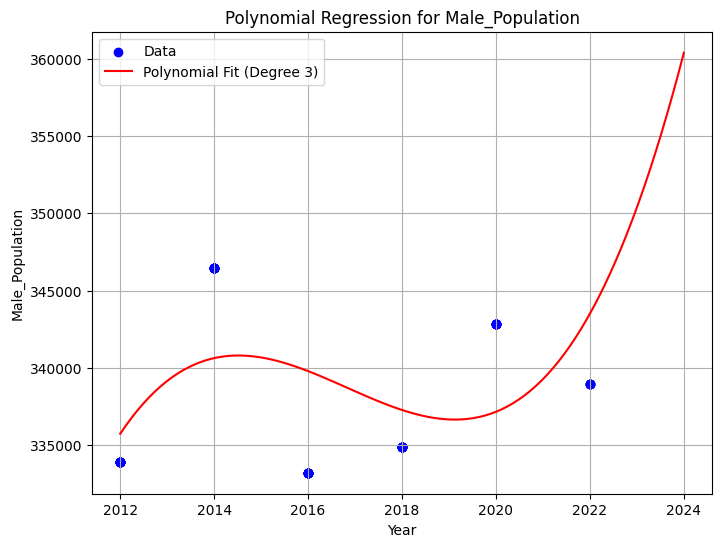

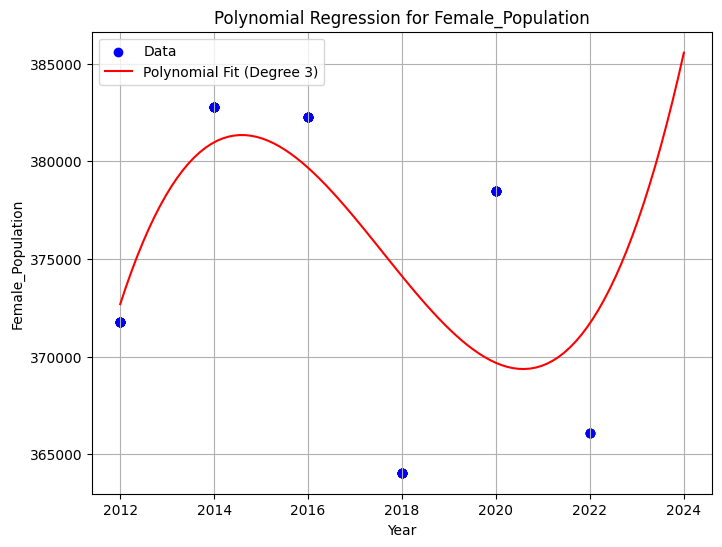

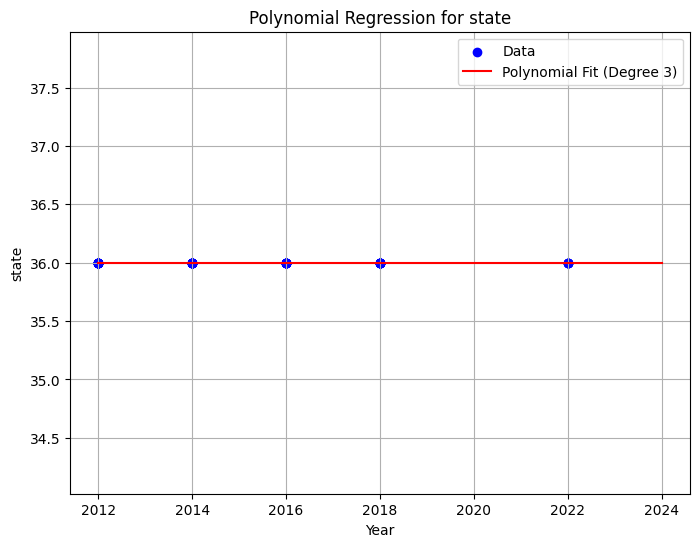

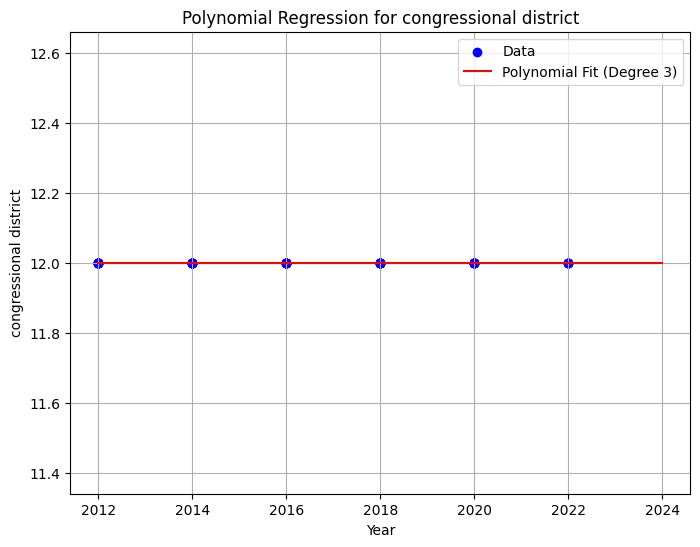

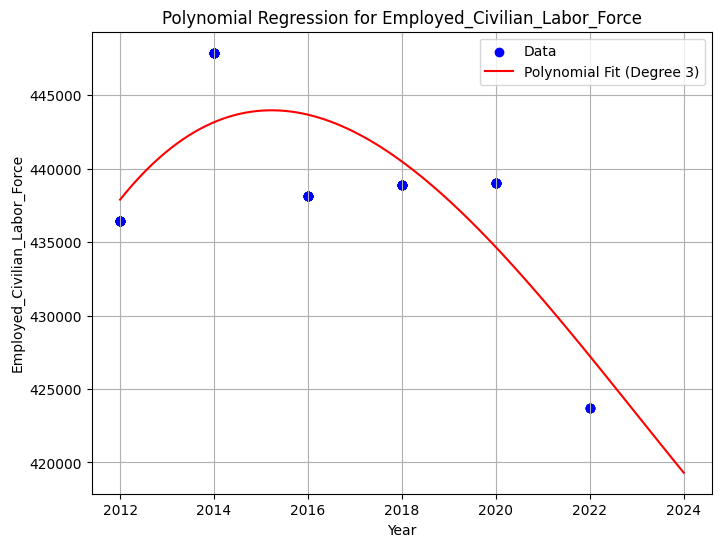

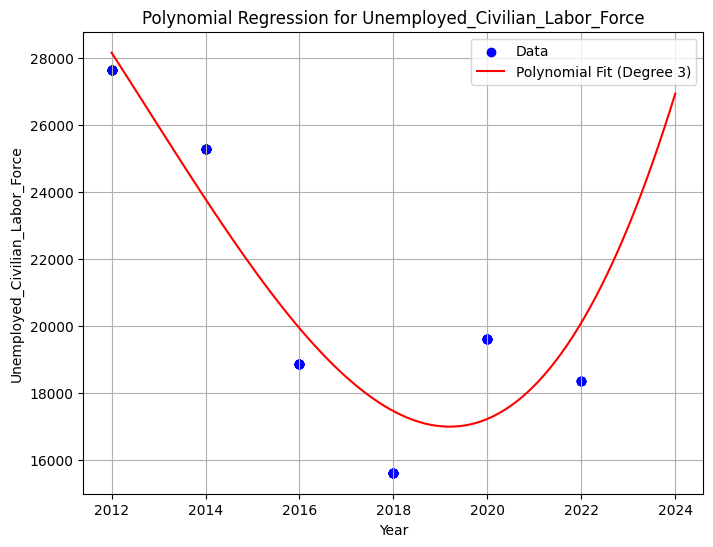

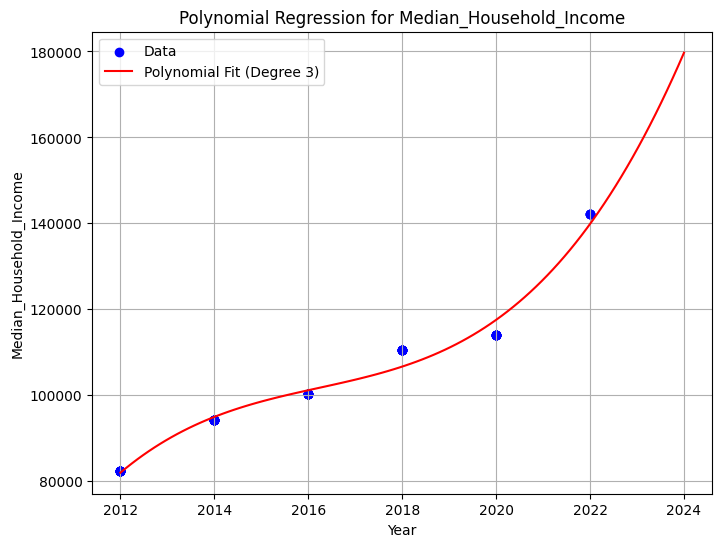

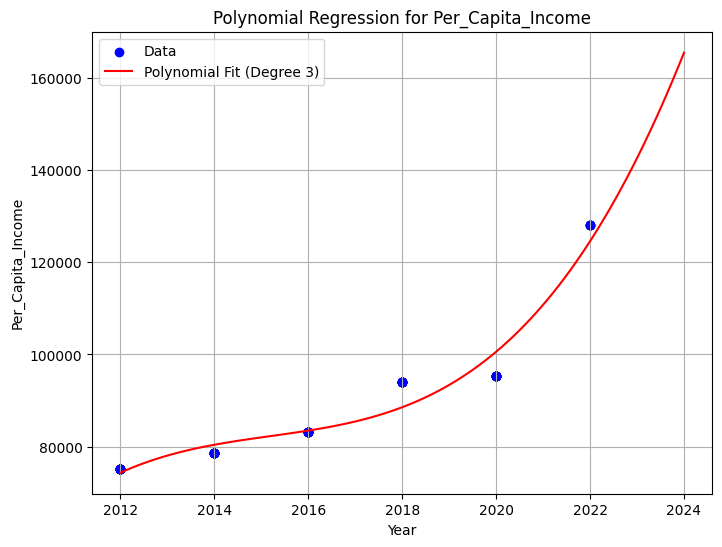

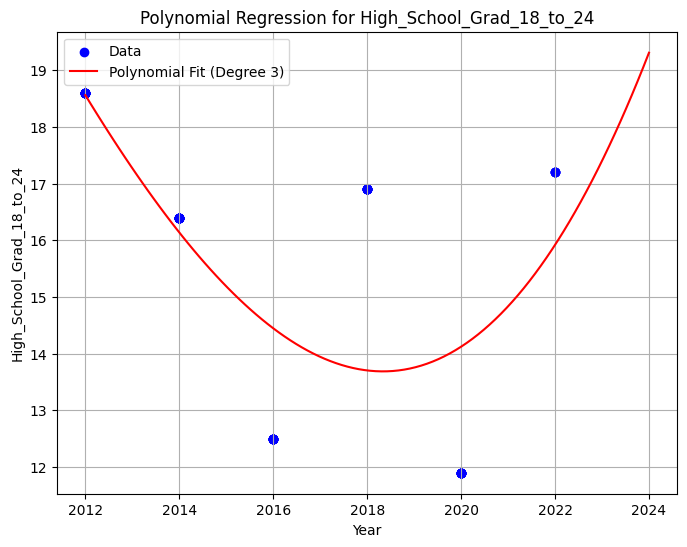

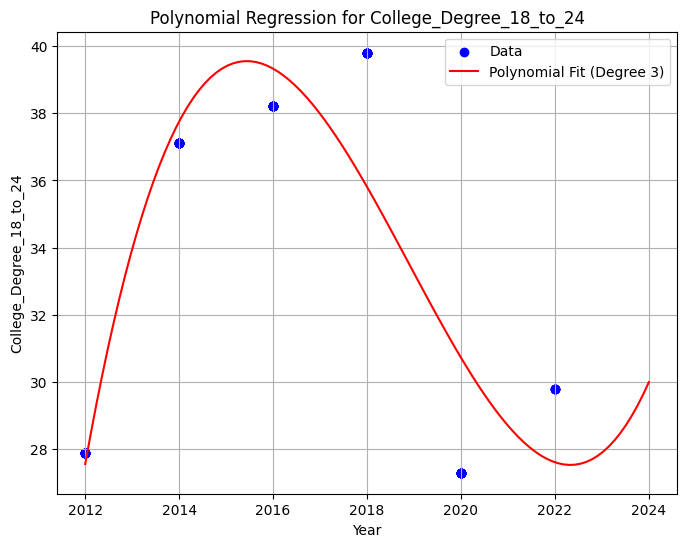

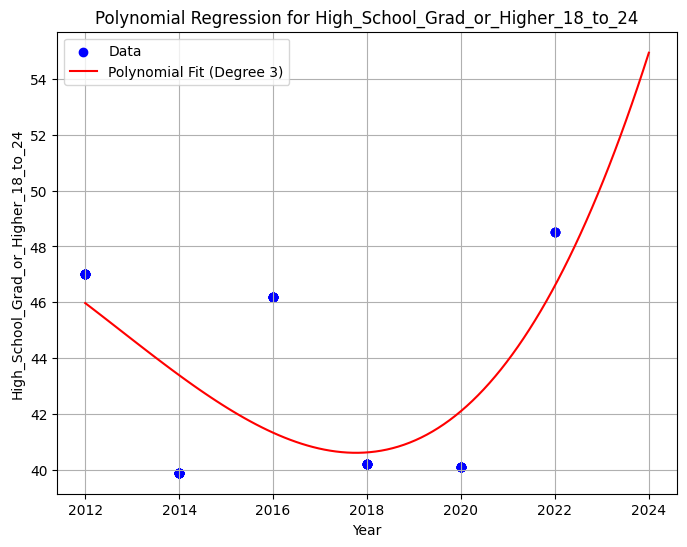

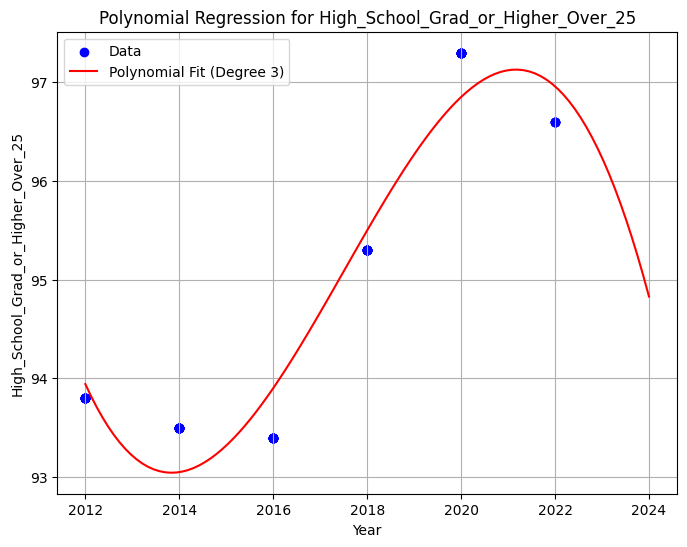

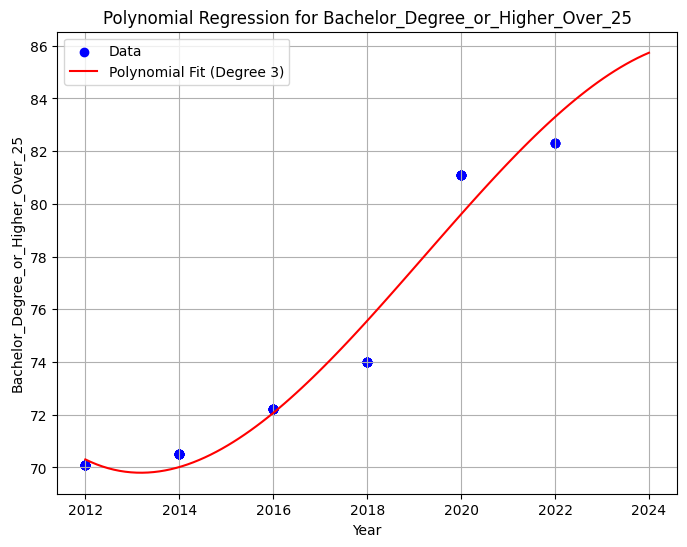

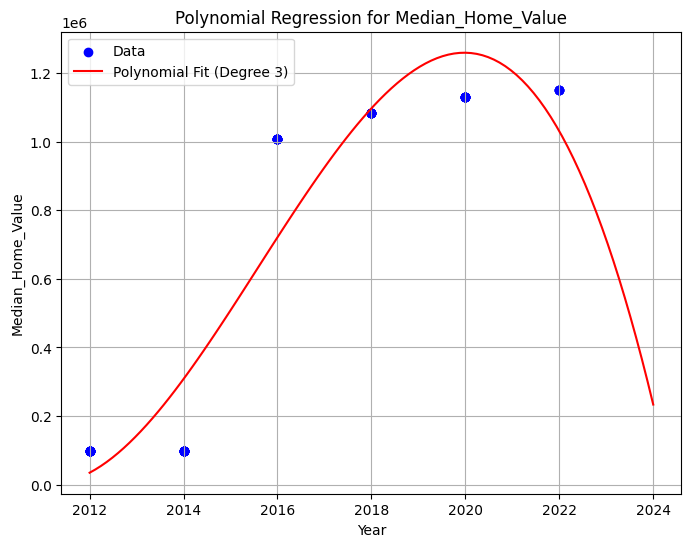

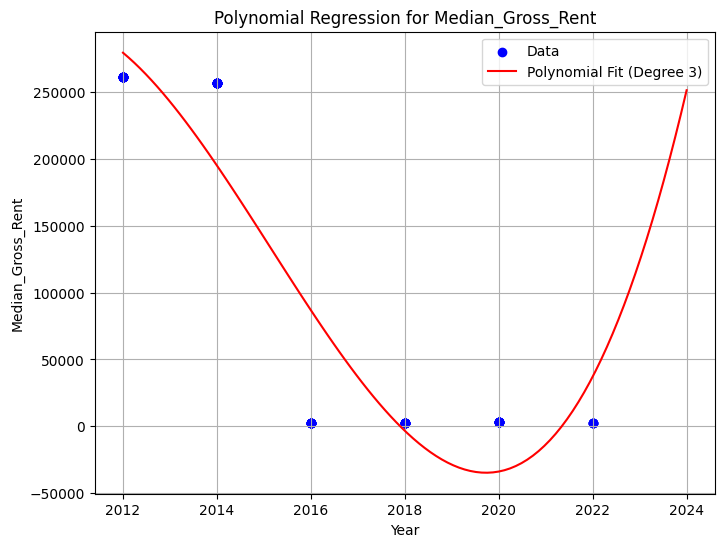

Predicted Total_Population for 2024: 745946.40
Predicted Population_Under_18 for 2024: 113354.51
Predicted Median_Age for 2024: 45.99
Predicted Population_18_and_Over for 2024: 632591.90
Predicted Population_65_and_Over for 2024: 176018.82
Predicted White_Alone for 2024: 429294.74
Predicted Black_or_African_American_Alone for 2024: 36994.35
Predicted Asian_Alone for 2024: 103068.27
Predicted Hispanic_or_Latino for 2024: 84627.34
Predicted Male_Population for 2024: 360396.34
Predicted Female_Population for 2024: 385560.31
Predicted state for 2024: 36.00
Predicted congressional district for 2024: 12.00
Predicted Employed_Civilian_Labor_Force for 2024: 419299.59
Predicted Unemployed_Civilian_Labor_Force for 2024: 26940.89
Predicted Median_Household_Income for 2024: 179715.02
Predicted Per_Capita_Income for 2024: 165518.65
Predicted High_School_Grad_18_to_24 for 2024: 19.31
Predicted College_Degree_18_to_24 for 2024: 30.00
Predicted High_School_Grad_or_Higher_18_to_24 for 2024: 54.93
Predi

In [34]:
#District
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Define the degree of the polynomial
degree = 3  # Adjust as needed (e.g., 2, 3, etc.)

# Initialize a dictionary to store predictions
predictions = {}

for column in columns_to_extrapolate:
    # Prepare the data and exclude the years 2010 and 2020
    df = merged_data[['Year', column]].dropna()  # Drop rows with NaN values
    df = df[~df['Year'].isin([2010])]  # Exclude 2010 and 2020
    X = df[['Year']].values
    y = df[column].values

    # Define Polynomial Features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Train a Polynomial Regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict for 2024
    X_2024_poly = poly.transform([[2024]])
    prediction = model.predict(X_2024_poly)
    predictions[column] = prediction[0]

    # Plot the polynomial regression for the current feature
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data')  # Original data points
    X_fit = np.linspace(X.min(), 2024, 100).reshape(-1, 1)  # Generate smooth curve
    X_fit_poly = poly.transform(X_fit)
    y_fit = model.predict(X_fit_poly)
    plt.plot(X_fit, y_fit, color='red', label=f'Polynomial Fit (Degree {degree})')  # Polynomial fit

    # Customize the plot
    plt.title(f"Polynomial Regression for {column}")
    plt.xlabel("Year")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

# Display the predictions
for column, value in predictions.items():
    print(f"Predicted {column} for 2024: {value:.2f}")


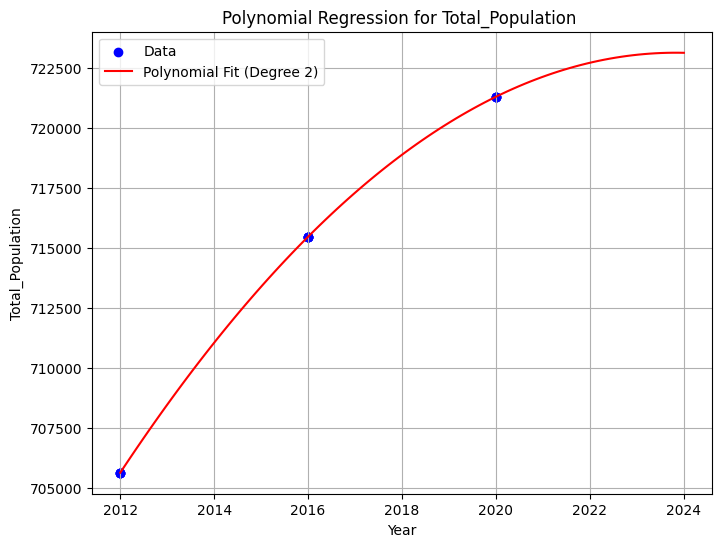

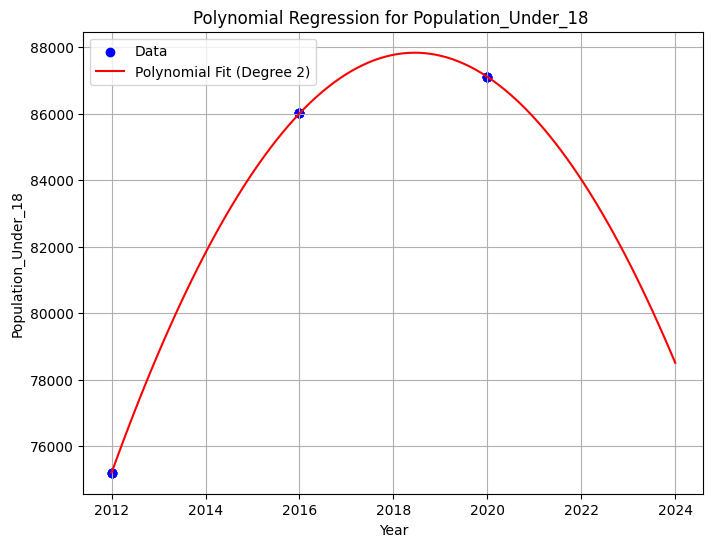

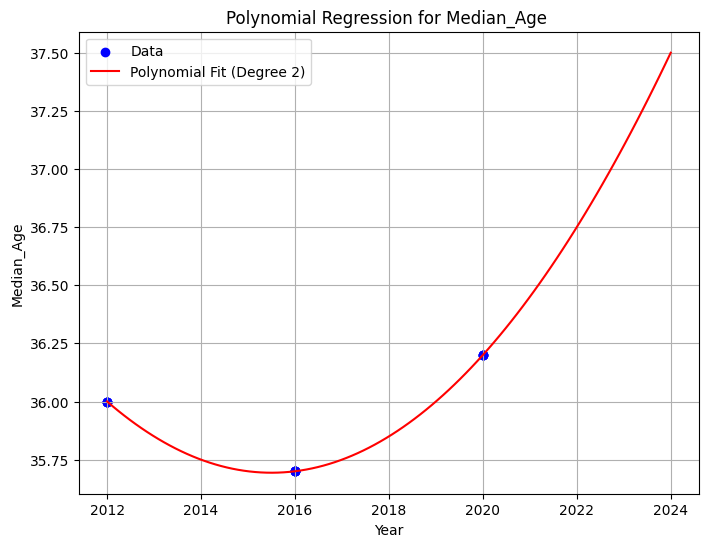

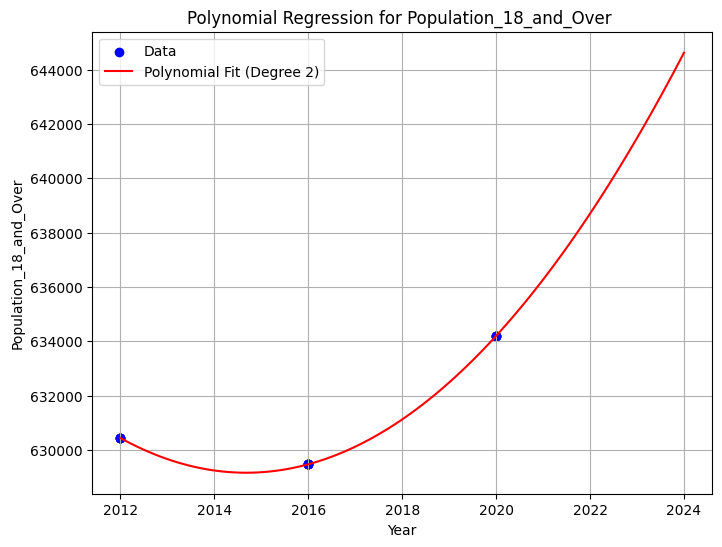

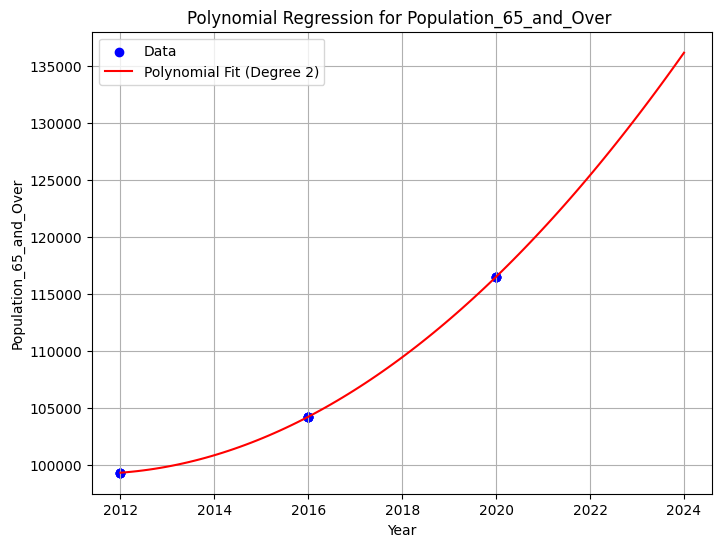

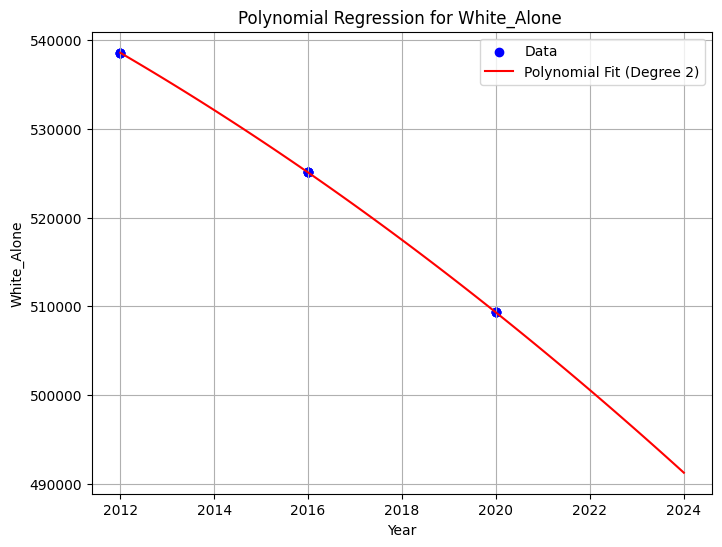

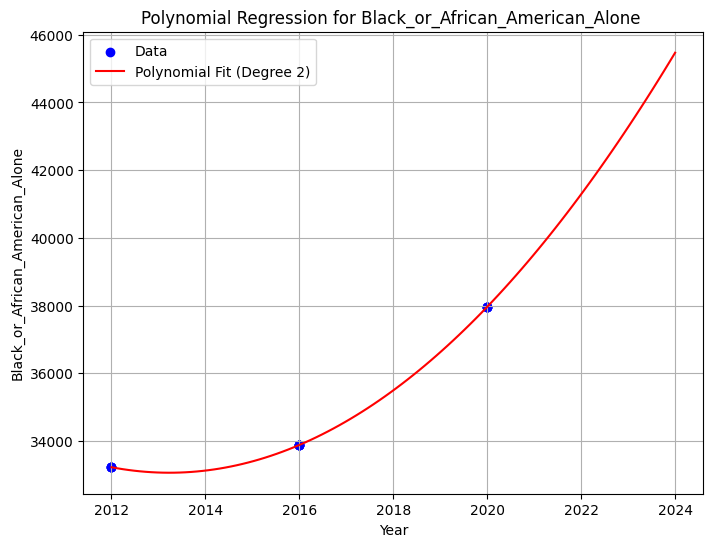

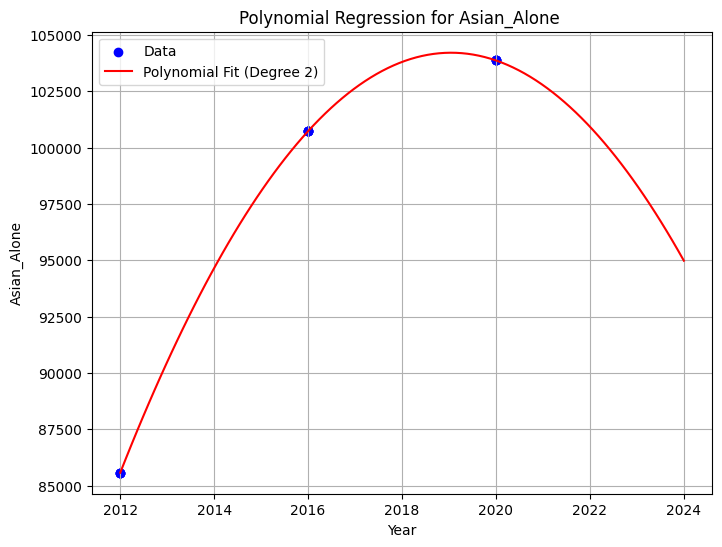

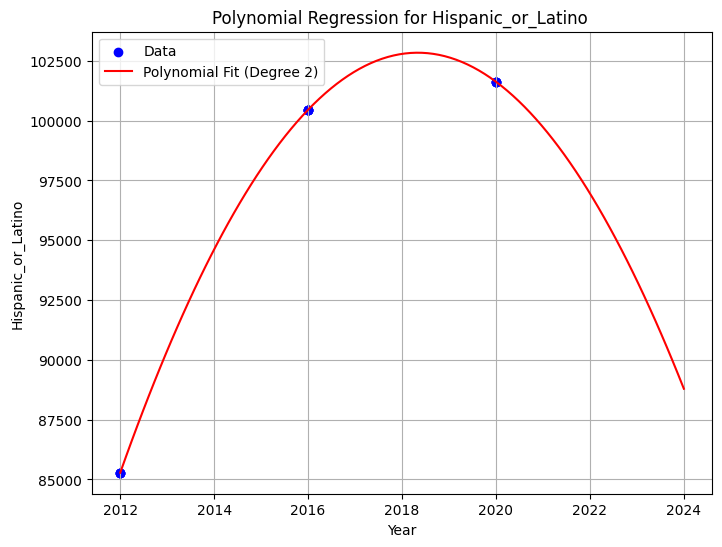

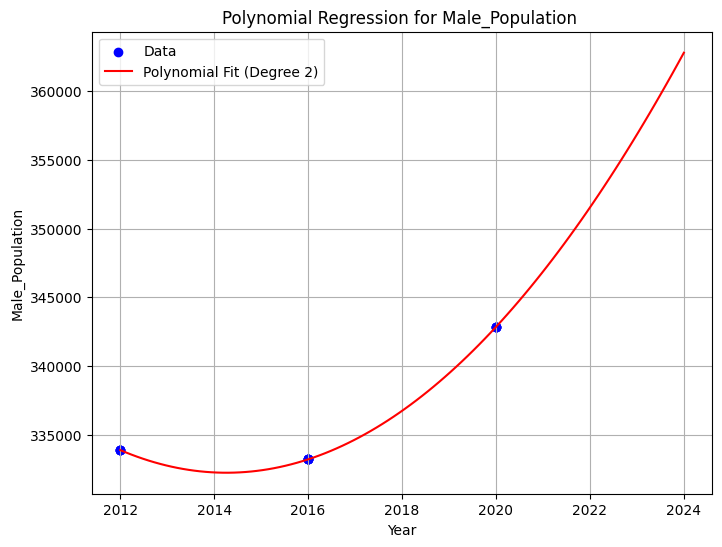

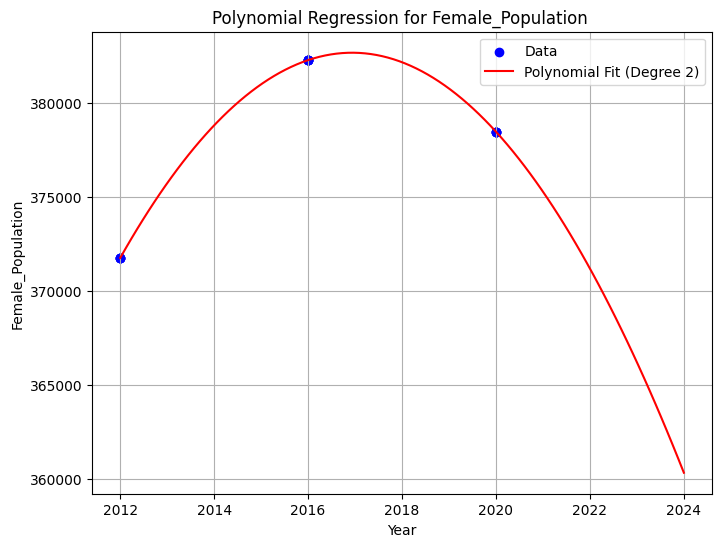

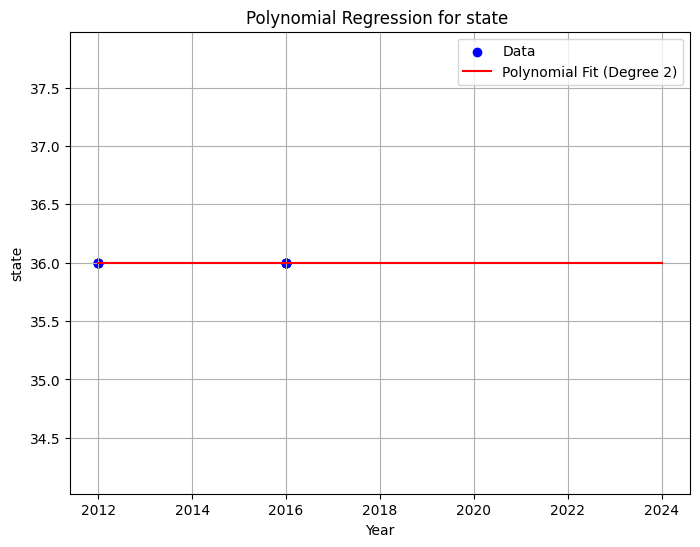

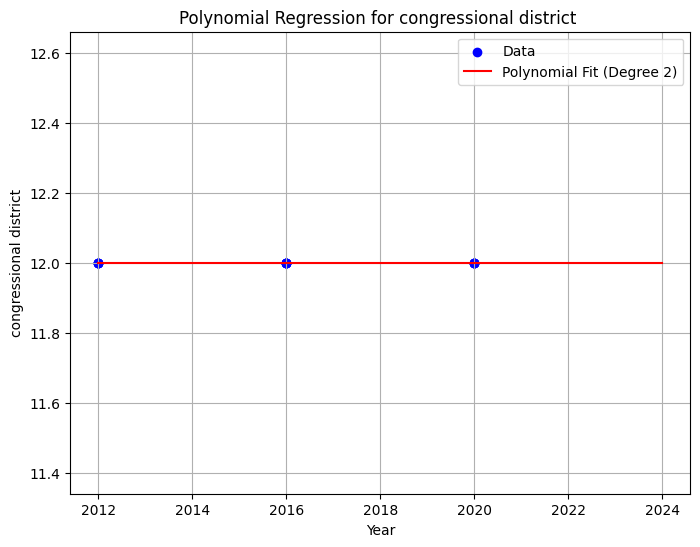

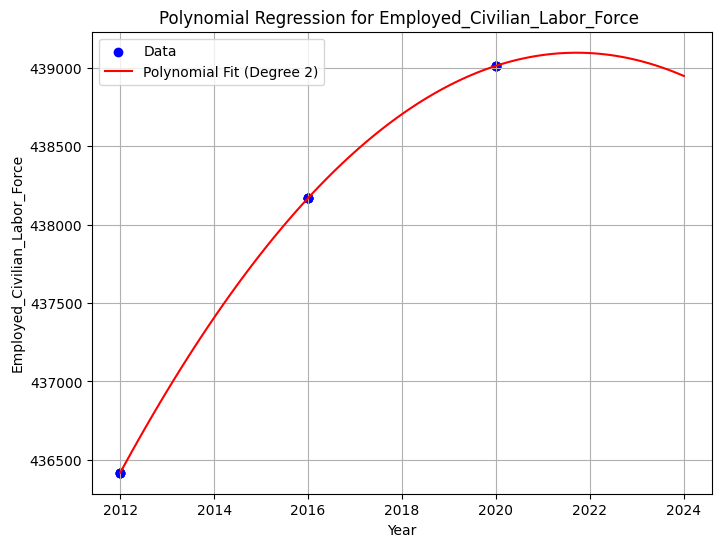

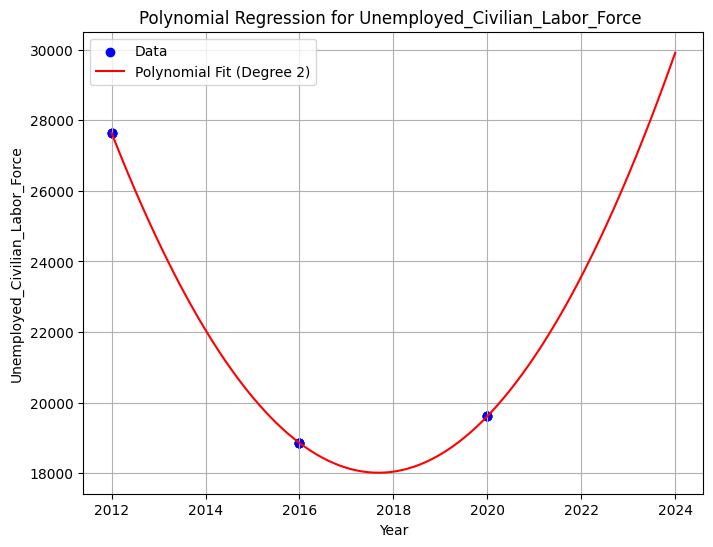

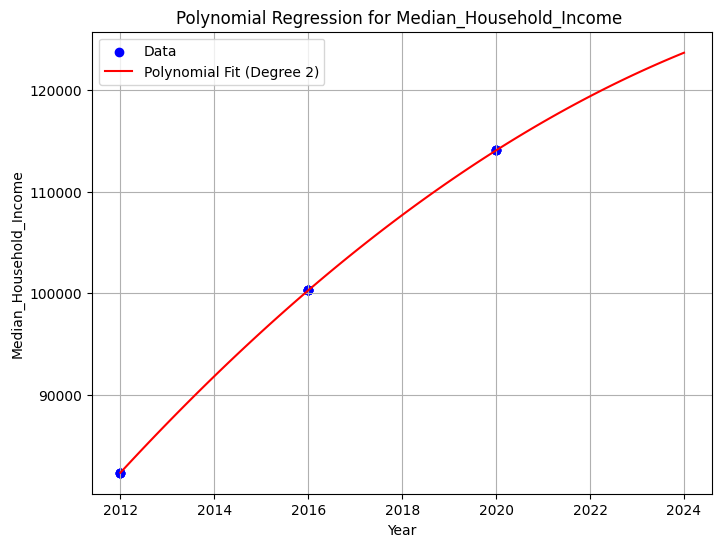

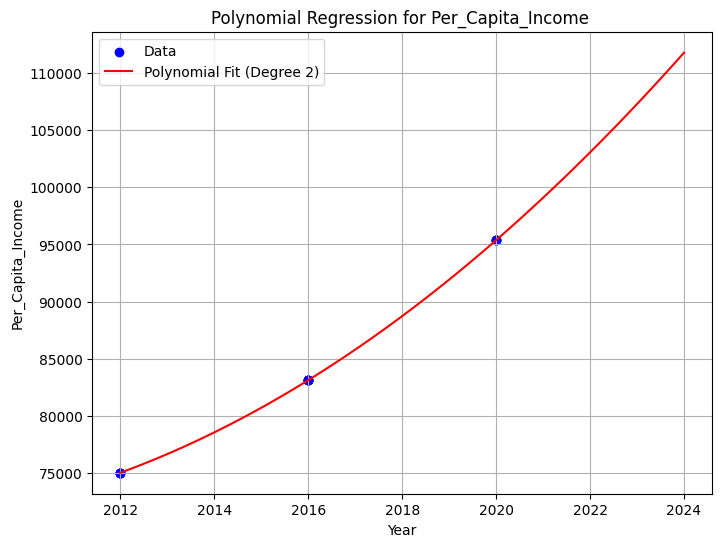

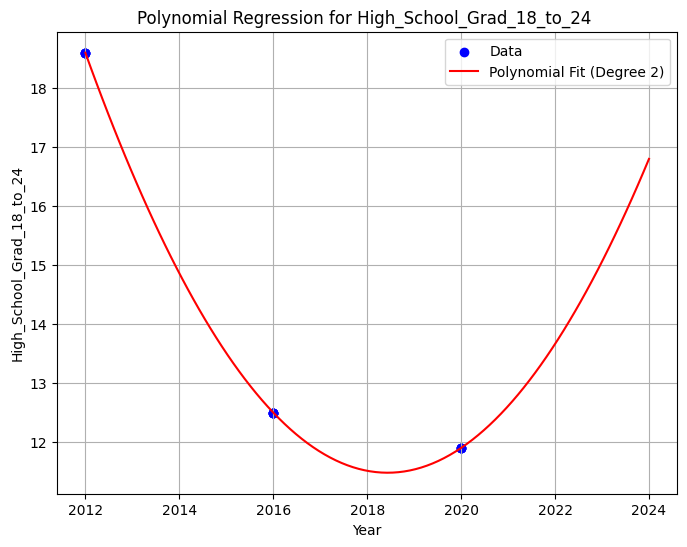

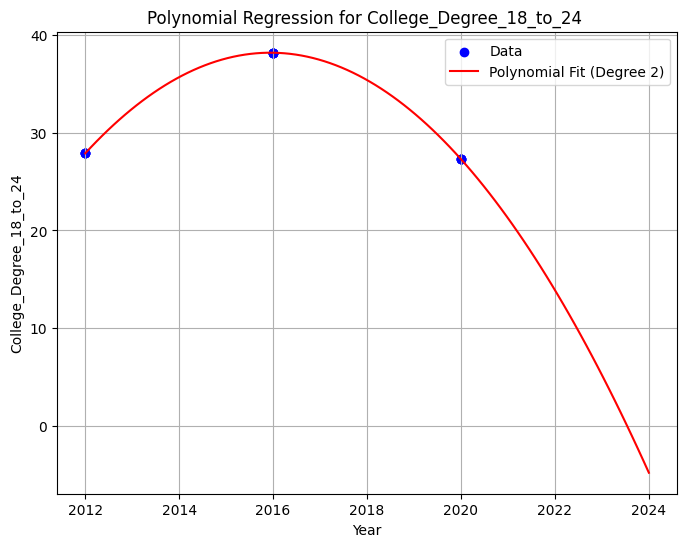

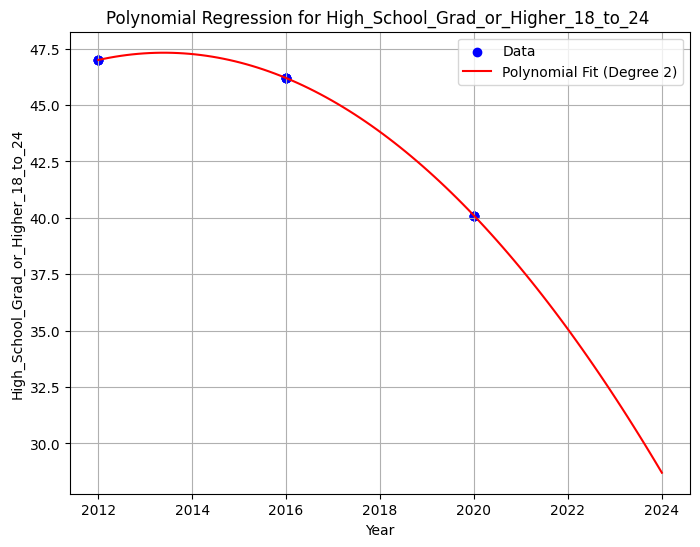

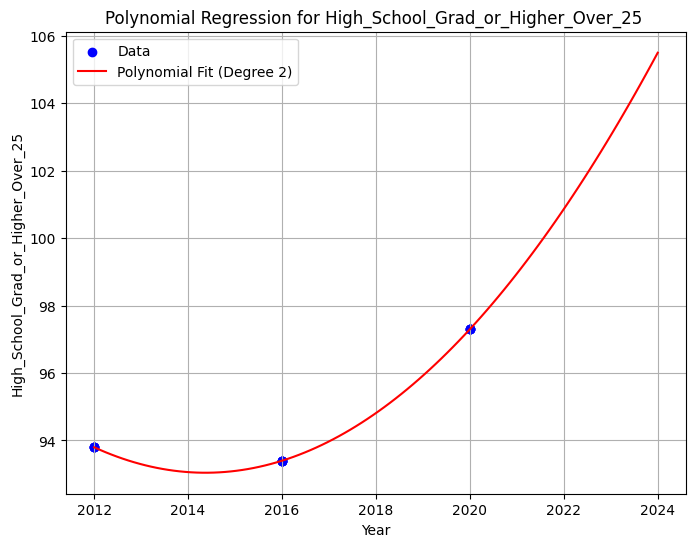

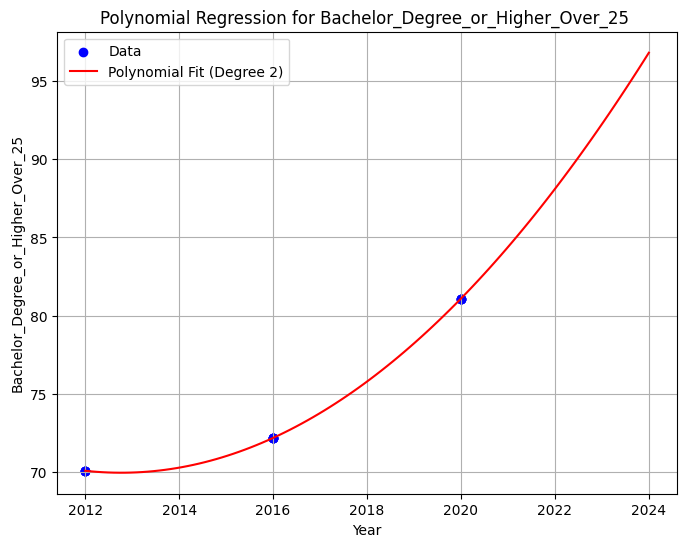

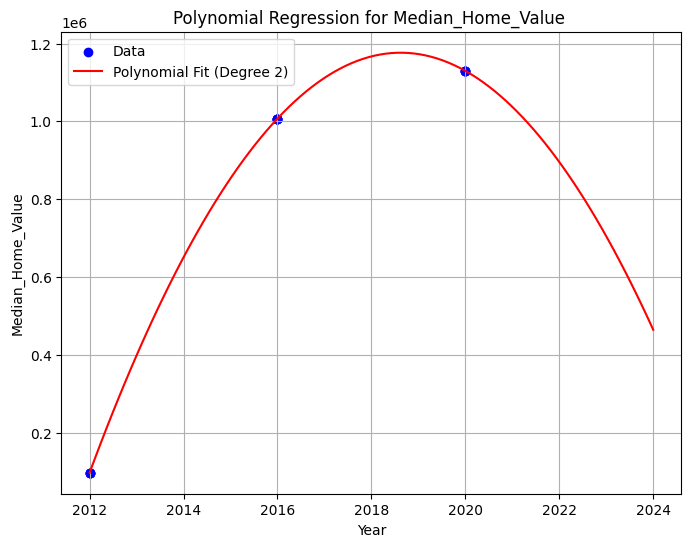

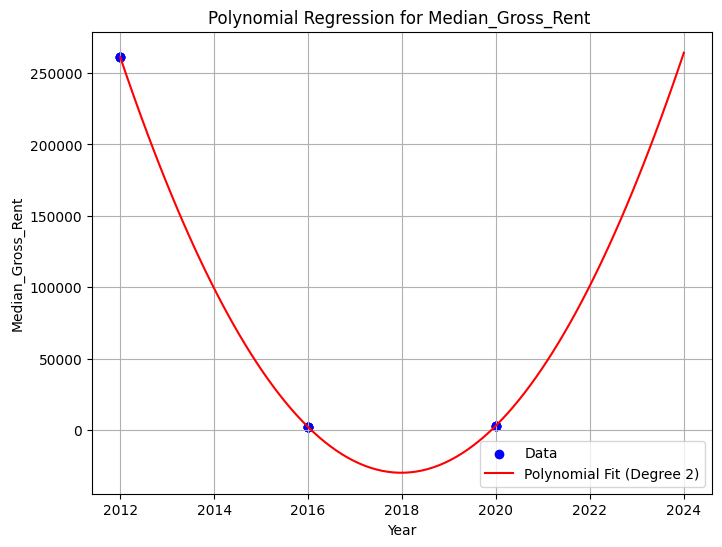

Predicted Total_Population for 2024: 723133.00
Predicted Population_Under_18 for 2024: 78505.00
Predicted Median_Age for 2024: 37.50
Predicted Population_18_and_Over for 2024: 644628.00
Predicted Population_65_and_Over for 2024: 136161.00
Predicted White_Alone for 2024: 491235.00
Predicted Black_or_African_American_Alone for 2024: 45468.00
Predicted Asian_Alone for 2024: 94985.00
Predicted Hispanic_or_Latino for 2024: 88792.00
Predicted Male_Population for 2024: 362809.00
Predicted Female_Population for 2024: 360339.00
Predicted state for 2024: 36.00
Predicted congressional district for 2024: 12.00
Predicted Employed_Civilian_Labor_Force for 2024: 438947.00
Predicted Unemployed_Civilian_Labor_Force for 2024: 29916.00
Predicted Median_Household_Income for 2024: 123669.00
Predicted Per_Capita_Income for 2024: 111783.00
Predicted High_School_Grad_18_to_24 for 2024: 16.80
Predicted College_Degree_18_to_24 for 2024: -4.80
Predicted High_School_Grad_or_Higher_18_to_24 for 2024: 28.70
Predict

In [35]:
#President
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Define the degree of the polynomial
degree = 2  # Adjust as needed (e.g., 2, 3, etc.)

# Columns to extrapolate
columns_to_extrapolate = [ 'Total_Population',
       'Population_Under_18', 'Median_Age', 'Population_18_and_Over',
       'Population_65_and_Over', 'White_Alone',
       'Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino',
       'Male_Population', 'Female_Population', 'state',
       'congressional district', 'Employed_Civilian_Labor_Force',
       'Unemployed_Civilian_Labor_Force', 'Median_Household_Income',
       'Per_Capita_Income', 'High_School_Grad_18_to_24',
       'College_Degree_18_to_24', 'High_School_Grad_or_Higher_18_to_24',
       'High_School_Grad_or_Higher_Over_25',
       'Bachelor_Degree_or_Higher_Over_25', 'Median_Home_Value',
       'Median_Gross_Rent']

# Initialize a dictionary to store predictions
predictions = {}

for column in columns_to_extrapolate:
    # Prepare the data and exclude the years 2010 and 2020
    df = merged_data_pres[['Year', column]].dropna()  # Drop rows with NaN values
    df = df[~df['Year'].isin([2010])]  # Exclude 2010 and 2020
    X = df[['Year']].values
    y = df[column].values

    # Define Polynomial Features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Train a Polynomial Regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict for 2024
    X_2024_poly = poly.transform([[2024]])
    prediction = model.predict(X_2024_poly)
    predictions[column] = prediction[0]

    # Plot the polynomial regression for the current feature
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data')  # Original data points
    X_fit = np.linspace(X.min(), 2024, 100).reshape(-1, 1)  # Generate smooth curve
    X_fit_poly = poly.transform(X_fit)
    y_fit = model.predict(X_fit_poly)
    plt.plot(X_fit, y_fit, color='red', label=f'Polynomial Fit (Degree {degree})')  # Polynomial fit

    # Customize the plot
    plt.title(f"Polynomial Regression for {column} ")
    plt.xlabel("Year")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

# Display the predictions
for column, value in predictions.items():
    print(f"Predicted {column} for 2024: {value:.2f}")


In [36]:
#District
features = [
 'Population_Under_18', 'Median_Age', 'Population_18_and_Over',
       'Population_65_and_Over', 'White_Alone',
       'Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino',
       'Male_Population', 'Female_Population', 'Employed_Civilian_Labor_Force',
       'Unemployed_Civilian_Labor_Force', 'Median_Household_Income',
       'Per_Capita_Income', 'High_School_Grad_18_to_24',
       'College_Degree_18_to_24', 'High_School_Grad_or_Higher_18_to_24',
       'Bachelor_Degree_or_Higher_Over_25', 'Median_Home_Value',
       'Median_Gross_Rent'
]

# Construct your 2024 data (use extrapolated values for features)
data_2024 = {

  'Population_Under_18':[113354],
       'Median_Age':[46],
       'Population_18_and_Over':[632591],
       'Population_65_and_Over':[176018],
       'White_Alone':[429294],
       'Black_or_African_American_Alone':[36994],
       'Asian_Alone':[103068],
       'Hispanic_or_Latino':[84627],
       'Male_Population':[360396],
       'Female_Population':[385560],
       'Employed_Civilian_Labor_Force':[438947],
       'Unemployed_Civilian_Labor_Force':[29916],
       'Median_Household_Income':[123669],
       'Per_Capita_Income':[111783],
       'High_School_Grad_18_to_24':[16.80],
       'College_Degree_18_to_24':[40.80],
       'High_School_Grad_or_Higher_18_to_24':[28.70],
       'Bachelor_Degree_or_Higher_Over_25':[96.80],
       'Median_Home_Value':[1189916],
       'Median_Gross_Rent':[17044]

}

X_2024 = pd.DataFrame(data_2024)





In [37]:
features = [
    'Population_Under_18', 'Median_Age', 'Population_18_and_Over',
       'Population_65_and_Over', 'White_Alone',
       'Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino',
       'Male_Population', 'Female_Population', 'Employed_Civilian_Labor_Force',
       'Unemployed_Civilian_Labor_Force', 'Median_Household_Income',
       'Per_Capita_Income', 'High_School_Grad_18_to_24',
       'College_Degree_18_to_24', 'High_School_Grad_or_Higher_18_to_24',
       'Bachelor_Degree_or_Higher_Over_25', 'Median_Home_Value',
       'Median_Gross_Rent'
]

# Construct your 2024 data (use extrapolated values for features)
data_2024_pres = {
       'Population_Under_18':[78505],
       'Median_Age':[37.50],
       'Population_18_and_Over':[644628],
       'Population_65_and_Over':[136161],
       'White_Alone':[491235],
       'Black_or_African_American_Alone':[45468],
       'Asian_Alone':[94985],
       'Hispanic_or_Latino':[88792],
       'Male_Population':[362809],
       'Female_Population':[360339],
       'Employed_Civilian_Labor_Force':[438947],
       'Unemployed_Civilian_Labor_Force':[29916],
       'Median_Household_Income':[123669],
       'Per_Capita_Income':[111783],
       'High_School_Grad_18_to_24':[16.80],
       'College_Degree_18_to_24':[40.80],
       'High_School_Grad_or_Higher_18_to_24':[28.70],
       'Bachelor_Degree_or_Higher_Over_25':[96.80],
       'Median_Home_Value':[1189916],
       'Median_Gross_Rent':[17044]
}

X_2024_pres = pd.DataFrame(data_2024_pres)





In [38]:
#President
X = merged_data_pres[features]
y = merged_data_pres[target]

# Train-test split and model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
#print(classification_report(y_test, y_pred))

In [39]:
# Predict Pres
prediction_2024 = model.predict(X_2024_pres)
prediction_label = {'Democratic': 'Democrat', 'Republican': 'Republican'}
print("Predicted Winner for 2024:", prediction_label[prediction_2024[0]])

Predicted Winner for 2024: Democrat


In [40]:
#District
X = merged_data[features]
y = merged_data[target]

# Train-test split and model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
#print(classification_report(y_test, y_pred))


In [41]:
# Predict District
prediction_2024 = model.predict(X_2024)
prediction_label = {'Democratic': 'Democrat', 'Republican': 'Republican'}
print("Predicted Winner for 2024:", prediction_label[prediction_2024[0]])

Predicted Winner for 2024: Democrat


In [42]:
#Districct
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Filter data for Democratic and Republican primary parties
filtered_data = merged_data[merged_data['primary_party'].isin(['Democratic', 'Republican'])]

# Filter duplicates by keeping only the first instance for each candidate_id and Year
filtered_data = filtered_data.drop_duplicates(subset=['candidate_id', 'Year'], keep='first')

# Aggregate data to get total votes by year and primary party
aggregated_data = filtered_data.groupby(['Year', 'primary_party'])['total_votes'].sum().reset_index()

# Filter out 2010 from the data
aggregated_data = aggregated_data[aggregated_data['Year'] != 2010]

# Prepare features (X) and target (y)
features = ['Year', 'Median_Age', 'Population_18_and_Over', 'Population_65_and_Over', 'White_Alone',
            'Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino',
            'Male_Population', 'Female_Population']  # Add relevant features
aggregated_data = pd.merge(
    aggregated_data,
    filtered_data[['Year', 'Median_Age', 'Population_18_and_Over', 'Population_65_and_Over', 'White_Alone',
                   'Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino', 'Male_Population',
                   'Female_Population']].drop_duplicates(),
    on='Year', how='left'
)
X = aggregated_data[features]
y = aggregated_data['total_votes']

# Train a separate model for each party
predictions_2024 = {}
for party in ['Democratic', 'Republican']:
    party_data = aggregated_data[aggregated_data['primary_party'] == party]
    X_party = party_data[features]
    y_party = party_data['total_votes']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_party, y_party, test_size=0.1, random_state=42)

    # Train Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate the model
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # Metrics for training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
   # train_r2 = r2_score(y_train, y_train_pred)

    # Metrics for test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    #test_r2 = r2_score(y_test, y_test_pred)

    #print(f"\n{party} Party Metrics:")
    #print(f"Training - MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.2f}")
    #print(f"Testing  - MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

    # Predict for 2024
    X_2024 = pd.DataFrame({'Year': [2024], 'Median_Age': [45.21], 'Population_18_and_Over': [649187],
                           'Population_65_and_Over': [172145], 'White_Alone': [448978],
                           'Black_or_African_American_Alone': [38084], 'Asian_Alone': [108866],
                           'Hispanic_or_Latino': [106474], 'Male_Population': [366850], 'Female_Population': [405412]})
    predictions_2024[party] = rf_model.predict(X_2024)[0]

# Display the predictions
print("\nPredictions for 2024:")
for party, prediction in predictions_2024.items():
    print(f"Predicted total votes for {party} in 2024: {prediction:.2f}")



Predictions for 2024:
Predicted total votes for Democratic in 2024: 208646.25
Predicted total votes for Republican in 2024: 43988.11


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Filter data for Democratic and Republican primary parties
filtered_data = merged_data_pres[merged_data_pres['primary_party'].isin(['Democratic', 'Republican'])]

# Filter duplicates by keeping only the first instance for each candidate_id and Year
filtered_data = filtered_data.drop_duplicates(subset=['candidate_id', 'Year'], keep='first')

# Aggregate data to get total votes by year and primary party
aggregated_data = filtered_data.groupby(['Year', 'primary_party'])['total_votes'].sum().reset_index()

# Filter out 2010 from the data
aggregated_data = aggregated_data[aggregated_data['Year'] != 2010]

# Prepare features (X) and target (y)
features = ['Year','Median_Age','Population_18_and_Over','Population_65_and_Over', 'White_Alone','Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino', 'Male_Population', 'Female_Population']  # Add relevant features
aggregated_data = pd.merge(
    aggregated_data,
    filtered_data[['Year','Median_Age','Population_18_and_Over','Population_65_and_Over', 'White_Alone','Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino', 'Male_Population', 'Female_Population'] ].drop_duplicates(),
    on='Year', how='left'
)
X = aggregated_data[features]
y = aggregated_data['total_votes']

# Train a separate model for each party
predictions_2024 = {}
for party in ['Democratic', 'Republican']:
    party_data = aggregated_data[aggregated_data['primary_party'] == party]
    X_party = party_data[features]
    y_party = party_data['total_votes']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_party, y_party, test_size=0.2, random_state=42)

    # Train Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    #print(f"Mean Squared Error for {party} Party: {mse}")

    # Predict for 2024
    X_2024 = pd.DataFrame({'Year': [2024], 'Median_Age': [45.21], 'Population_18_and_Over': [649187],'Population_65_and_Over': [172145], 'White_Alone':[448978],'Black_or_African_American_Alone':[38084], 'Asian_Alone':[108866], 'Hispanic_or_Latino':[106474], 'Male_Population':[366850], 'Female_Population':[405412]})
    predictions_2024[party] = rf_model.predict(X_2024)[0]

# Display the predictions
for party, prediction in predictions_2024.items():
    print(f"Predicted total votes for {party} in 2024: {0.42*prediction:.2f}")


Predicted total votes for Democratic in 2024: 317961.61
Predicted total votes for Republican in 2024: 33310.64


In [44]:
voter_turnout = (317961 + 33310)/545361 #Predicted votes/total registered voters
voter_turnout

0.6441072977348948

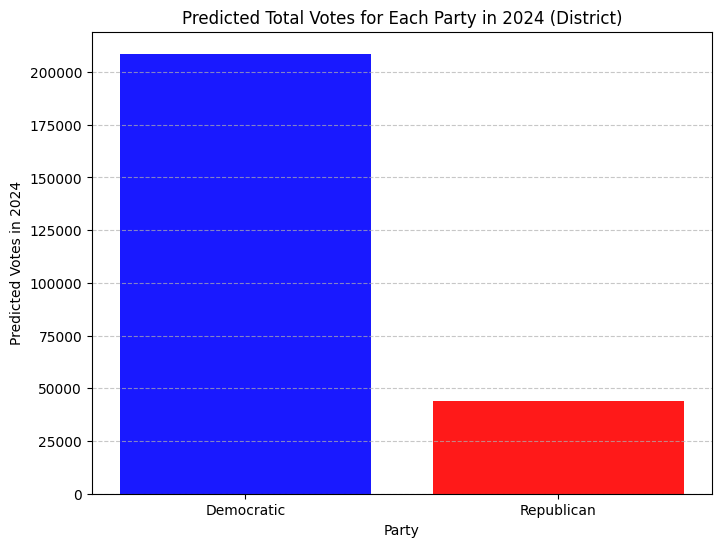

In [45]:
import matplotlib.pyplot as plt

# Data for bar plot
parties = ['Democratic', 'Republican']
votes_2024 = [208646, 43988]  # Predicted vote counts from the results

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(parties, votes_2024, color=['blue', 'red'], alpha=0.9)

# Add labels and title
plt.xlabel("Party")
plt.ylabel("Predicted Votes in 2024")
plt.title("Predicted Total Votes for Each Party in 2024 (District)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


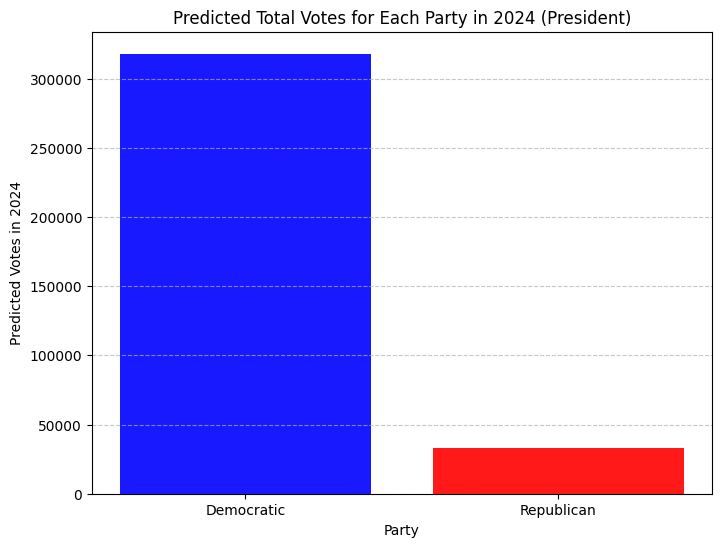

In [46]:
import matplotlib.pyplot as plt

# Data for bar plot
parties = ['Democratic', 'Republican']
votes_2024 = [317961, 33310]  # Predicted vote counts from the results

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(parties, votes_2024, color=['blue', 'red'], alpha=0.9)

# Add labels and title
plt.xlabel("Party")
plt.ylabel("Predicted Votes in 2024")
plt.title("Predicted Total Votes for Each Party in 2024 (President)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


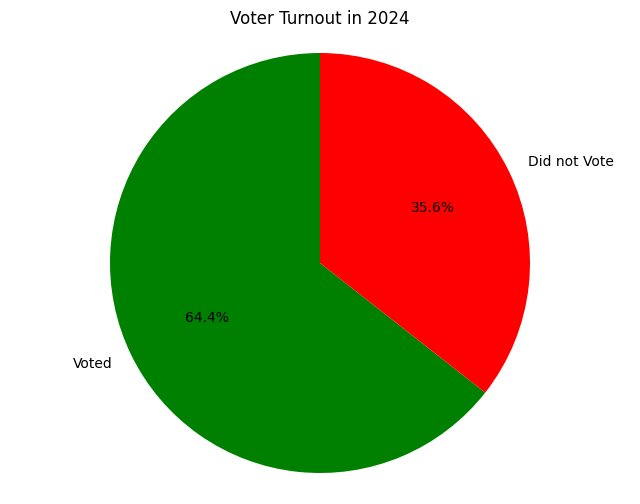

In [47]:
import matplotlib.pyplot as plt

# Data
votes = 317961 + 33310
registered_voters = 545361
turnout_percentage = (votes / registered_voters) * 100
non_turnout_percentage = 100 - turnout_percentage

# Labels and sizes
labels = ['Voted', 'Did not Vote']
sizes = [turnout_percentage, non_turnout_percentage]
colors = ['green', 'red']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Voter Turnout in 2024")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.

# Show the chart
plt.show()
